예상 순서

1. 데이터 자료 수집 : 데이터 분석의 첫 단계로, 분석할 데이터를 수집. 이 단계에서 데이터의 출처와 형식을 정확히 확인

2. 수집자료 불러오기 : 수집한 데이터를 적절한 형식으로 불러와서 사용 가능한 형태로 가공

3. 데이터프레임 타입 확인 : 데이터프레임을 불러온 후, 데이터의 구조와 타입을 확인

4. 결측치 확인 : 데이터프레임에서 결측치(missing values)가 있는지 확인

5. 결측치 있으면 처리 : 결측치가 있을 경우, 적절한 방법으로 대체하거나 제거

6. 기초통계량 확인 : 데이터의 대략적인 분포와 통계적 특성을 파악하기 위해 기초통계량을 확인. 평균, 중앙값, 표준편차 등을 확인

7. 레그플롯, 박스플롯, 히스토그램 : 해당 그래프들을 이용하여 이상치 있는지 확인 및 도수분포 확인

8. 이상치 제거 : 이상치가 발견되면 query함수를 이용하여 제외시킴

9. 레그플롯, 히스토그램(도수 분포 제대로 됬는지 확인) 재확인 : 이상치 제거 후 분석 진행 전 더블 체크하기

10. 신뢰구간 확인 : 데이터의 통계적 신뢰도를 파악하기 위해 신뢰구간을 확인. 이는 결과의 신뢰성을 판단하는데 도움을 줌

11. 각 요인별 상관관계 확인 : 산점도 행렬 및 히트맵 그래프를 이용하여 각 요인들간에 상관관계 있는 지 파악

12. 표준화 : 분석에 사용할 변수를 표준화하여 변수 간 스케일 차이를 해소하고 분석 결과를 더욱 해석하기 쉽게 만듦

13. PCA 주성분분석 : PCA(주성분분석)를 사용하여 변수 간 상관관계를 파악하고 차원 축소를 통해 데이터의 변수 수를 줄임

14. 데이터 분석: 회귀분석을 사용하여 데이터 간 관계를 파악하고 해석

15. 정규분포가정(정규성 검정 대체) : 정규성 가정을 확인하거나 대체 방법을 사용하여 정규성을 검토

16. 그래프,차트 제시 : 분석 결과를 시각화하여 보다 명확하게 전달하고, 그래프와 차트를 통해 패턴과 관계를 시각적으로 확인

17. 결론 제시 및 ppt제작 : 분석 결과를 바탕으로 결론을 도출하고, PPT나 보고서 형식으로 결과를 제시

In [1]:
# 패키지 참조
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency,t
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from pandas import read_excel, DataFrame, merge, cut, get_dummies
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA #주성분 분석용 패키지
from matplotlib import pyplot as plt
from patsy import dmatrix
from scipy import stats
from math import sqrt
from pca import pca # 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
import statsmodels.api as sm
import seaborn as sb
import pandas as pd
import numpy as np
import sys
import os
# sys.path.append("../../") # helper 모듈의 위치 확인 후 입력 결정
import helper

In [2]:
# 그래프 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
# 프로젝트 목표 : 총생활비에 영향을 미치는 요소 파악하기

한국복지패널에서 매년 실시하는 계층의 규모 및 생활실태 조사 데이터를 기반으로 그 중에서 몇가지 요인들을 선정

총 7865 가구의 관측치가 존재.

| 변수 | 의미 | 기타 | 비고 |
| --- | --- | ---| --- |
| 총생활비 | 한달에 지출되는 총 생활비 | 월 / 단위:만원 | 종속변수 |
| 이자_배당금_연간소득 | 은행이자나 주식 배당금으로 얻는 연간 수입|년간 / 단위:만원 | 불로소득 |
| 임대료_연간소득 | 전세보증금,월세등 | 년간 / 단위:만원 | 불로소 득|
| 기타_소득 | 상여금, 장려금, 보상금 등 | 년간 / 단위:만원 | 불로소득 |
| 부모가보낸생활비 | 부모로부터 받은 보조금(생활비개념) | 년간 / 단위:만원 | 불로소득 |
| 자녀가보낸생활비 | 자녀로부터 받은 보조금(생활비개념) | 년간 / 단위:만원 | 불로소득 |
| 민간보조금 | 민간 개인 또는 단체로부터 받은 보조금(생활비개념) | 년간/ 단위:만원 | 불로소득 |
| 세금환급금 | 납세자가 내야할 세액보다 더 많이 내서 나오는 환급금 | 년간 / 단위:만원|불로소득 |
| 기초연금 | 저소득층 노인에게 지급하는 연금|년간 / 단위:만원 | 불로소득 |
| 공적연금 | 국민연금, 공무원연금, 군인연금, 사립학교교직원연금을 의미 | 년간 / 단위:만원 | 불로소득 |
| 재난지원금 | 코로나19에 따른 국민생계 안정을 위해 지원하는 금액 | 년간 / 단위:만원|불로소득 |
| 금융기관대출 |금융권에서 받은 대출액 | 단위:만원 | 부채 |
| 주택관련_부채액 | 주택 구매,임대 관련하여 발생한 부채액(대출액) | 단위:만원|부채 |
| 주거관련_부채의_이자 | 주택관련 부채액의 이자 | 년간 / 단위:만원 | 부채 |
| 기타_이자|일반 대출이나 기타 사항에 의해 발생한 이자 | 년간 / 단위:만원 | 부채 |


해당 변수는 전부 수치형 데이터로 이루어져있다(category 형식이 없음을 확인).


재난지원금이나 공적연금도 불로소득에 포함되는가?

불로소득

말 그대로 일(노동)을 하지 않고 얻는 소득을 의미.

불로소득에 범주로는 은행예금,채권이자,주식배당,용돈,부동산 임대수익,골동품과 미술품같은 공급이 제한된 재화에서 판매하여 나오는 차익,상속/증여세,복지제도 혜택,연금등이 포함.

여기서 공적연금과 기초연금은 연금속성으로 간주하고 재난지원금은 복지제도의 혜택으로 간주하여 이번 조사 대상에 같이 포함하게 되었습니다.

>출처 : 네이버 지식백과,나무위키,위키백과

# #데이터 준비

In [4]:
#데이터 불러오기
df=read_excel("세미프로젝트3.xlsx")
df.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0


In [5]:
#원본 데이터 유지하기 위해 카피본 생성
df1=df.copy()

## #데이터형식 확인

In [6]:
#각 변수 데이터타입 확인하기
df1.dtypes

총생활비             int64
이자_배당금_연간소득    float64
임대료_연간소득         int64
기타_소득          float64
부모가보낸생활비       float64
자녀가보낸생활비         int64
민간보조금          float64
세금환급금          float64
기초연금             int64
공적연금             int64
재난지원금            int64
금융기관대출           int64
주택관련_부채액       float64
주거관련_부채의_이자      int64
기타이자           float64
dtype: object

In [7]:
#데이터가 많으므로 head함수 이용하여 일부분만 표시
df1.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0


In [8]:
#각 변수 데이터타입 확인하기
helper.prettyPrint(df1.dtypes, title='데이터 타입')

+----------------------+---------------+
|                      | 데이터 타입   |
|----------------------+---------------|
| 총생활비             | int64         |
| 이자_배당금_연간소득 | float64       |
| 임대료_연간소득      | int64         |
| 기타_소득            | float64       |
| 부모가보낸생활비     | float64       |
| 자녀가보낸생활비     | int64         |
| 민간보조금           | float64       |
| 세금환급금           | float64       |
| 기초연금             | int64         |
| 공적연금             | int64         |
| 재난지원금           | int64         |
| 금융기관대출         | int64         |
| 주택관련_부채액      | float64       |
| 주거관련_부채의_이자 | int64         |
| 기타이자             | float64       |
+----------------------+---------------+


## #결측치

### #결측치 확인

In [9]:
#결측치 확인하기

#해당 데이터에서 한번에 결측치 조회하는 방법
helper.prettyPrint(df1.isna().sum(), title='데이터 타입')

+----------------------+---------------+
|                      |   데이터 타입 |
|----------------------+---------------|
| 총생활비             |             0 |
| 이자_배당금_연간소득 |             0 |
| 임대료_연간소득      |             0 |
| 기타_소득            |             0 |
| 부모가보낸생활비     |             0 |
| 자녀가보낸생활비     |             0 |
| 민간보조금           |             0 |
| 세금환급금           |             0 |
| 기초연금             |             0 |
| 공적연금             |             0 |
| 재난지원금           |             0 |
| 금융기관대출         |             0 |
| 주택관련_부채액      |          1079 |
| 주거관련_부채의_이자 |             0 |
| 기타이자             |             0 |
+----------------------+---------------+


### #결측치 처리 - 0값으로 대체

In [10]:
# 주택관련_부채액에서 결측치 1079건이 확인되었고 부채액이 없는것으로 간주하고 수치값'0'으로 대체
re_df1=df1.fillna(value=0)
re_df1.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0


In [11]:
#결측치가 없는 데이터로 수정되었다.
helper.prettyPrint(re_df1.isna().sum(), title='결측치 확인')

+----------------------+---------------+
|                      |   결측치 확인 |
|----------------------+---------------|
| 총생활비             |             0 |
| 이자_배당금_연간소득 |             0 |
| 임대료_연간소득      |             0 |
| 기타_소득            |             0 |
| 부모가보낸생활비     |             0 |
| 자녀가보낸생활비     |             0 |
| 민간보조금           |             0 |
| 세금환급금           |             0 |
| 기초연금             |             0 |
| 공적연금             |             0 |
| 재난지원금           |             0 |
| 금융기관대출         |             0 |
| 주택관련_부채액      |             0 |
| 주거관련_부채의_이자 |             0 |
| 기타이자             |             0 |
+----------------------+---------------+


In [12]:
# 각 변수별로 0값이 아닌 수를 확인
# 0이 아닌 수가 너무 적으면 데이터를 선정한 의미가 없기 때문(정상적인 분석이 어렵다는 뜻)

results = []
for column in re_df1.columns:
    zero_count = re_df1.loc[re_df1[column] == 0].shape[0]
    number_count = re_df1.loc[re_df1[column] != 0].shape[0]
    results.append({
        '변수': column,
        '0 값인 수': zero_count,
        '0 값이 아닌 수': number_count
    })
result_df = DataFrame(results)
result_df

# # 각 셀의 글자를 가운데 맞춤
# style_df = result_df.style.set_properties(**{'text-align': 'center'})\
#                                 .set_table_styles([
#                                     {'selector': 'th.col_heading', 'props': [('text-align', 'center')]}])
# style_df

,변수,0 값인 수,0 값이 아닌 수
0,총생활비,0,7865
1,이자_배당금_연간소득,5489,2376
2,임대료_연간소득,6707,1158
3,기타_소득,1439,6426
4,부모가보낸생활비,6366,1499
5,자녀가보낸생활비,3296,4569
6,민간보조금,4019,3846
7,세금환급금,6275,1590
8,기초연금,4155,3710
9,공적연금,4777,3088


### #결과

- 컬럼 별로 0값이 아닌 수 가 전부 1000건 이상이라 따로 제외하는 변수 없이 진행하기로 결정.

>최소 1000개 이상의 유효한 데이터를 얻을 수 있다는 의미

## #데이터의 기초통계량 확인

전체적인 데이터의 특징을 알아보기 위해 기초통계량 표로 확인

describe

In [13]:
#해당 데이터 기초통계량 확인
#데이터 분석에 앞서 전체적인 데이터의 특징을 알아보기 위해 기초통계량 표로 확인하고자 한다.
re_df1.describe()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
count,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000
mean,329.821615,55.537889,129.335537,8.455906,45.949345,230.697394,58.165938,14.505976,193.395804,288.638525,94.907692,2958.797203,1773.447552,53.391736,47.884819
std,1314.994181,347.927318,644.462635,87.829841,218.871812,411.961750,202.688990,59.830654,219.694787,675.030701,143.003077,8277.347380,5527.462362,195.465924,358.612080
min,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000
50%,228.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
75%,435.000000,20.000000,0.000000,8.000000,0.000000,300.000000,30.000000,0.000000,360.000000,288.000000,105.000000,1700.000000,0.000000,0.000000,0.000000
max,114446.000000,22025.000000,17640.000000,5506.000000,5500.000000,6537.000000,4555.000000,1000.000000,936.000000,8796.000000,7140.000000,200000.000000,120000.000000,7200.000000,22616.000000


### 기초통계량 확인 결과

1) 조사 가구 수는 총 7865가구이다.
2) 총생활비의 평균값은 329.8만원이고 중앙값은 228만원, 최대값은 114446만원이다.
3) 이자_배당금_연간소득의 평균값은 55.5만원이고 중앙값은 0원, 최대값은 22025만원이다.
4) 임대료_연간소득의 평균값은 129.3만원이고 중앙값은 0원, 최대값은 17640만원이다.
5) 기타_소득의 평균값은 8.4만원이고 중앙값은 7만원, 최대값은 5506만원이다.
6) 부모가보낸생활비의 평균값은 45.9만원이고 중앙값은 0원, 최대값은 5500만원이다.
7) 자녀가보낸생활비의 평균값은 230.6만원이고 중앙값은 70만원, 최대값은 6537만원이다.
8) 민간보조금의 평균값은 58.1만원이고 중앙값은 0원, 최대값은 4555만원이다.
9) 세금환급금의 평균값은 14.5만원이고 중앙값은 0원, 최대값은 1000만원이다.
10) 기초연금의 평균값은 193.3만원이고 중앙값은 0원, 최대값은 936만원이다.
11) 공적연금의 평균값은 288.6만원이고 중앙값은 0원, 최대값은 8796만원이다.
12) 재난지원금의 평균값은 94.9만원이고 중앙값은 60만원, 최대값은 7140만원이다.
13) 금융기관대출의 평균값은 2958.7만원이고 중앙값은 0원, 최대값은 200000만원이다.
14) 주택관련_부채액의 평균값은 1773.4만원이고 중앙값은 0원, 최대값은 120000만원이다.
15) 주거관련_부채의_이자의 평균값은 53.3만원이고 중앙값은 0원, 최대값은 7200만원이다.
16) 기타이자의 평균값은 47.8만원이고 중앙값은 0원, 최대값은 22616원이다.

- 각 컬럼별 평균치에 비해 max값이 비정상적으로 높은 수치가 포함되어있음을 표로 확인. 
- 모든 변수의 평균값이 중앙값보다 크기 때문에 오른쪽으로 긴 분포를 지닐 것이라고 예상.
- 결론적으로 이상치가 존재할 가능성이 있다고 판단함.

## #이상치

### #히스토그램 생성

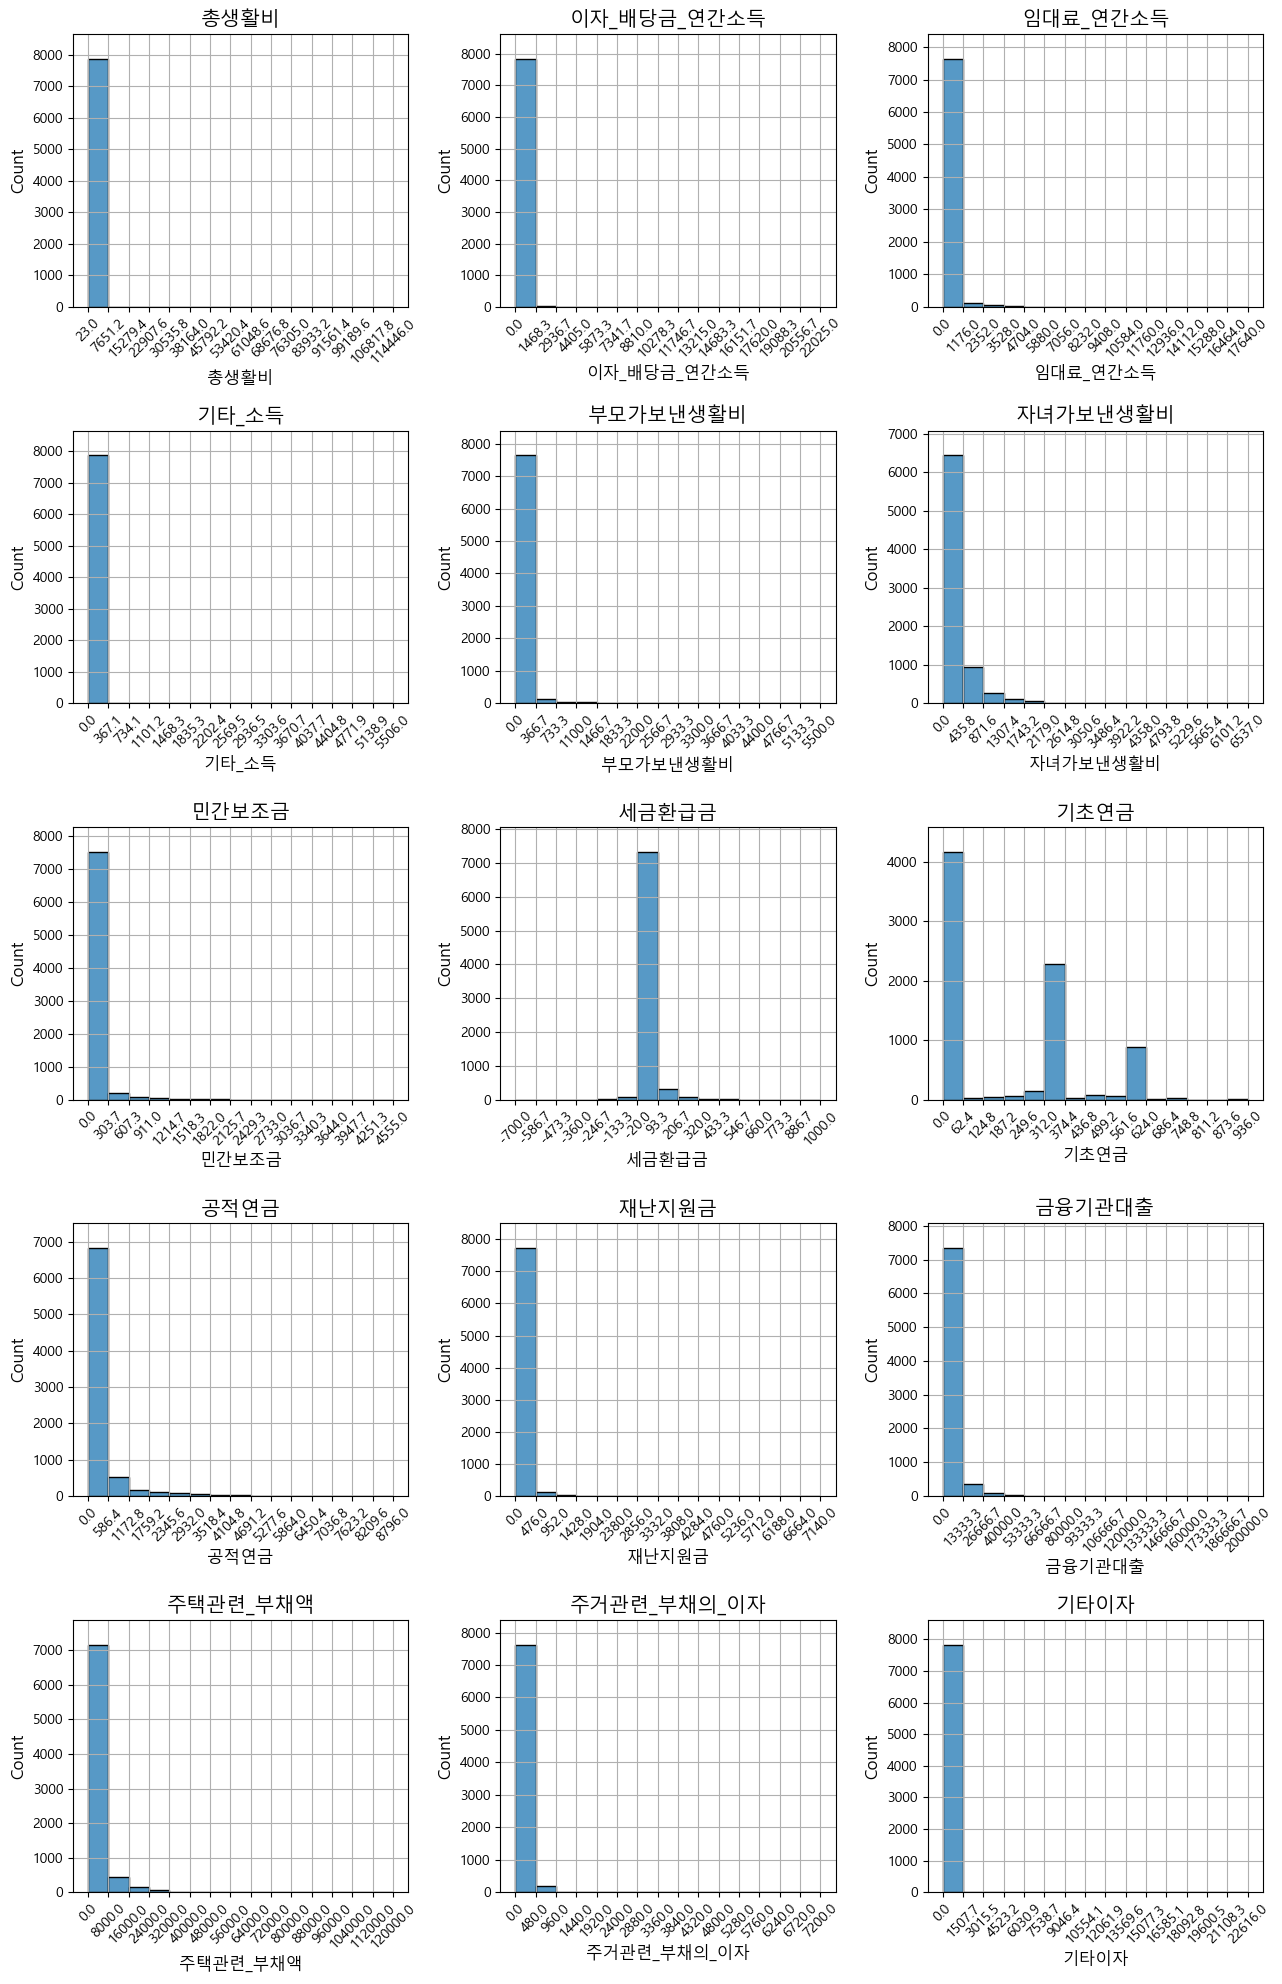

In [14]:
# 이상치 확인 전
# 데이터를 정리해서 볼 수 있도록 도수분포표(히스토그램) 확인

# 히스토그램과 bins(구간) 설정
num_bins = 15 
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(13, 20))  # 5x3 서브플롯 생성

for ax, column in zip(axes.flat, re_df1.columns):
    hist, bins = np.histogram(re_df1[column], bins=num_bins)
    bins2 = np.round(bins, 1)

    sb.histplot(data=re_df1, x=column, bins=num_bins, kde=False, ax=ax) #확률밀도곡선 미표시(티가 안 남)
    ax.set_title(column)  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_xticklabels(bins2, rotation=45, fontsize=10)  # x축 눈금 라벨(각도 45도), 폰트 설정
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 설정

    # y축 범위 설정(여유 범위를 넣어야 가독성이 좋아짐)
    y_max = hist.max() + hist.max() * 0.1  # 최대 도수에 10% 여유를 더한 값으로 y축 최댓값 설정
    ax.set_ylim(0, y_max)  # y축 범위 설정
    ax.grid(True) # 격자 표시

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

### #히스토그램 결과

- 각 컬럼별 최대값 때문에 도수분포가 비정상적으로 보이는 값이 있다고 판단.

- 변수들의 값이 특정 값에 상당히 치우쳐 있음을 확인함.

### #이상치 확인

#### #반복문과 sub plot을 이용해 regplot 조회

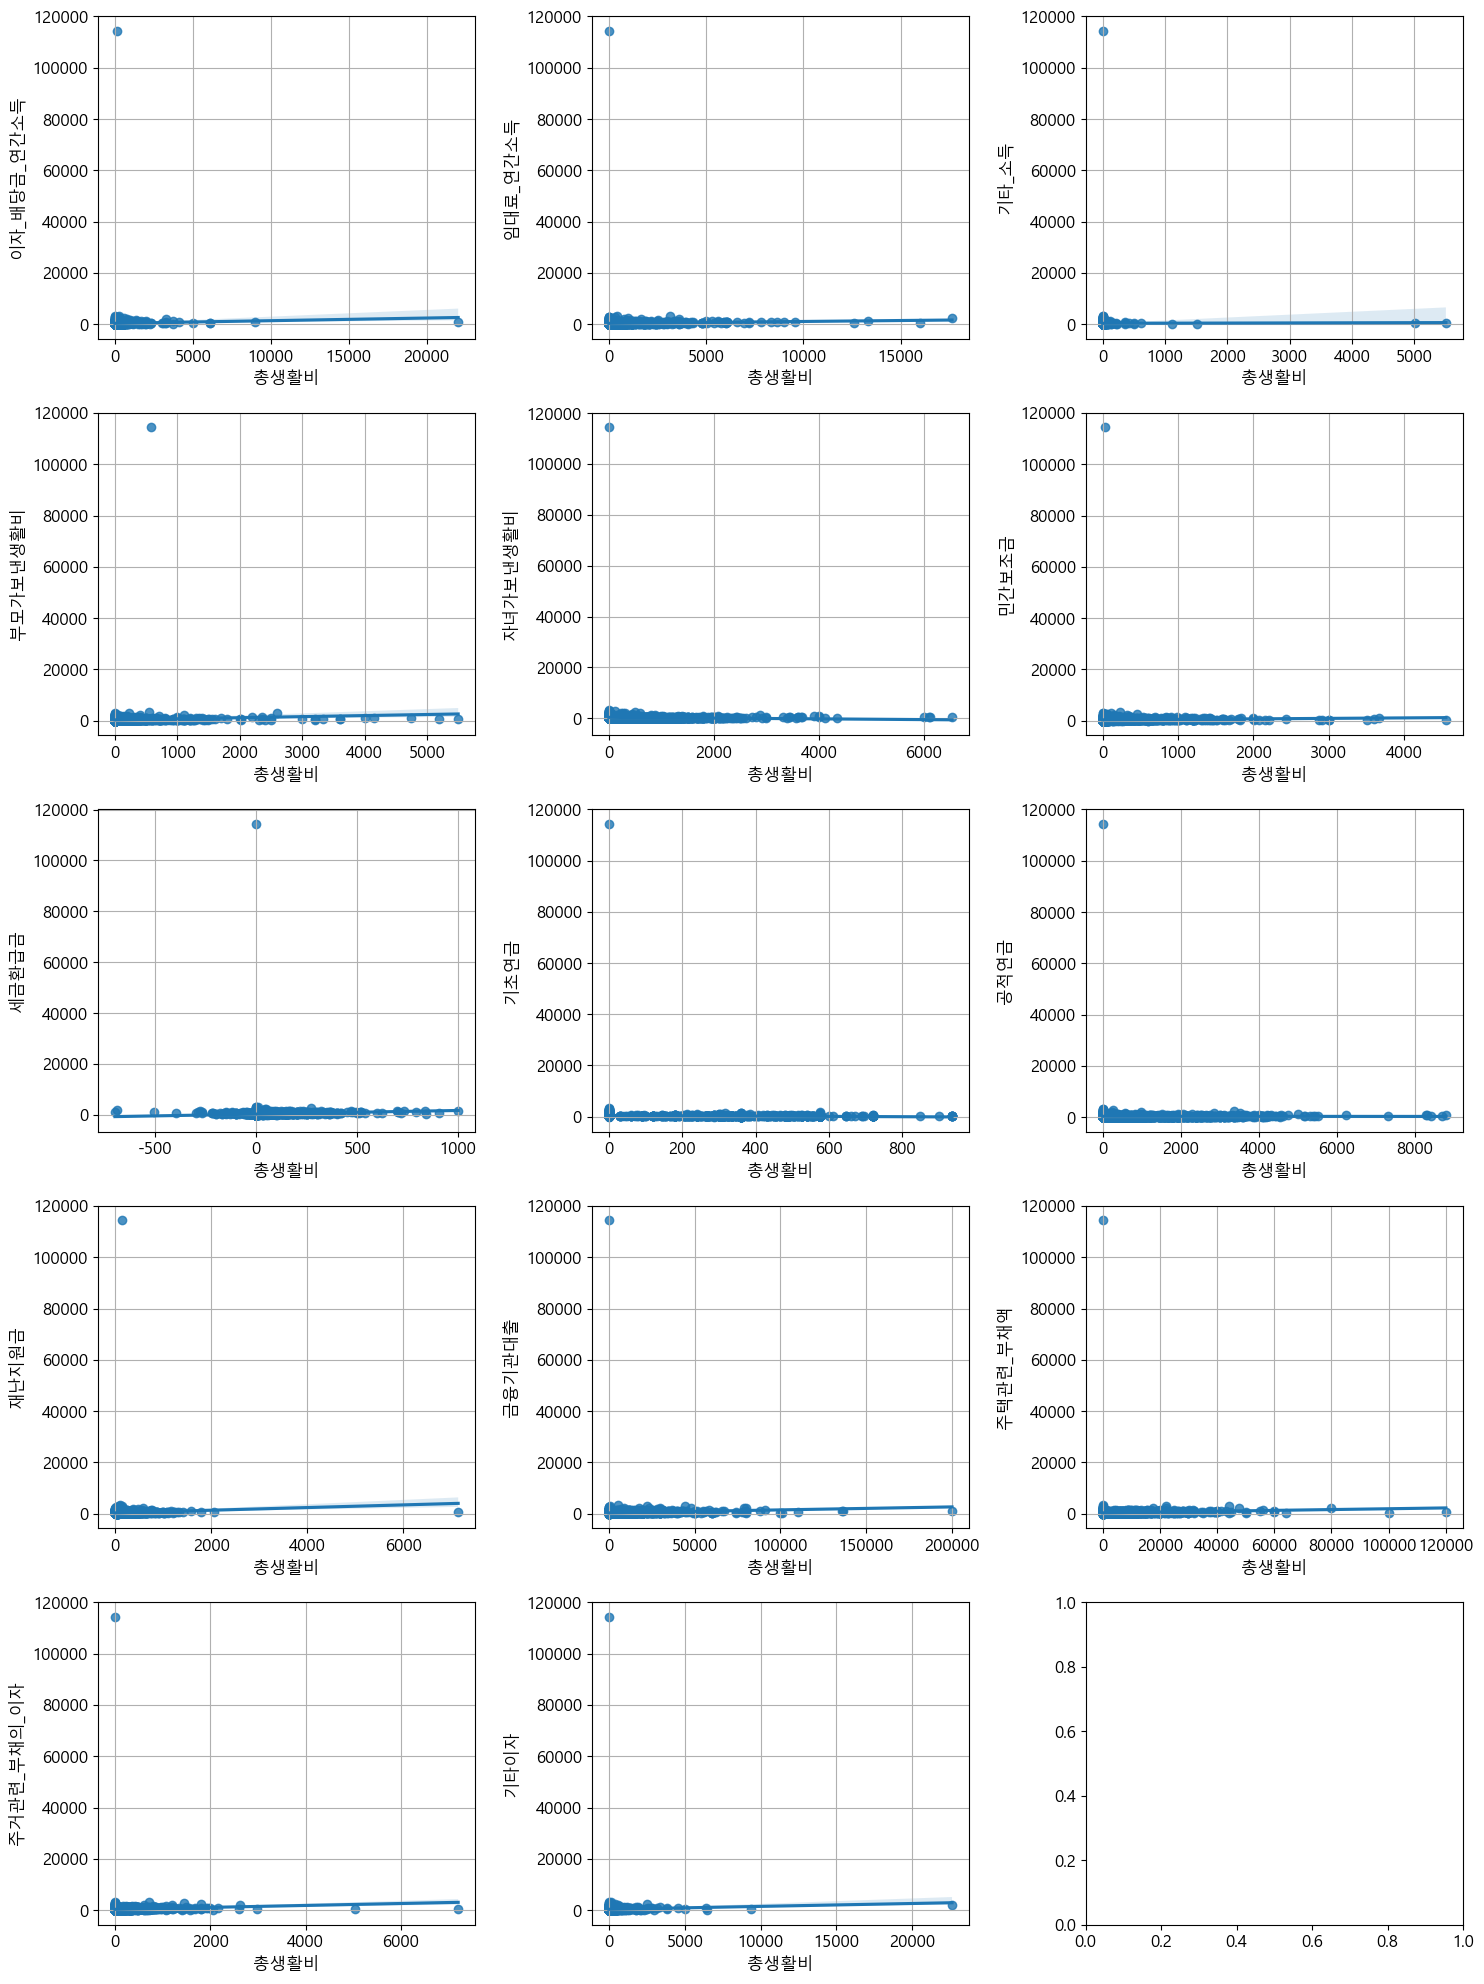

In [15]:
# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리기 때문에 1부터 시작
columns = list(re_df1.columns)[1:]

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    sb.regplot(data=re_df1, y=dependent_variable, x=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    plt.tight_layout() # 그래프 간격 조정
    ax[row, col].grid() # 격자표시

plt.show()
plt.close()


#### #regplot 시각화 결과

- 기초통계량에서 보았던 각 컬럼별 최대값 때문에 정상적인 산점도를 보기 어려움.
- 종속변수인 총생활비는 최대값에 의해 나머지 값들이 전부 몰려있는 것을 확인함.

#### #반복문과 sub plot을 이용해 boxplot 조회

boxplot을 통해 이상치 제거 구간을 선정한다.

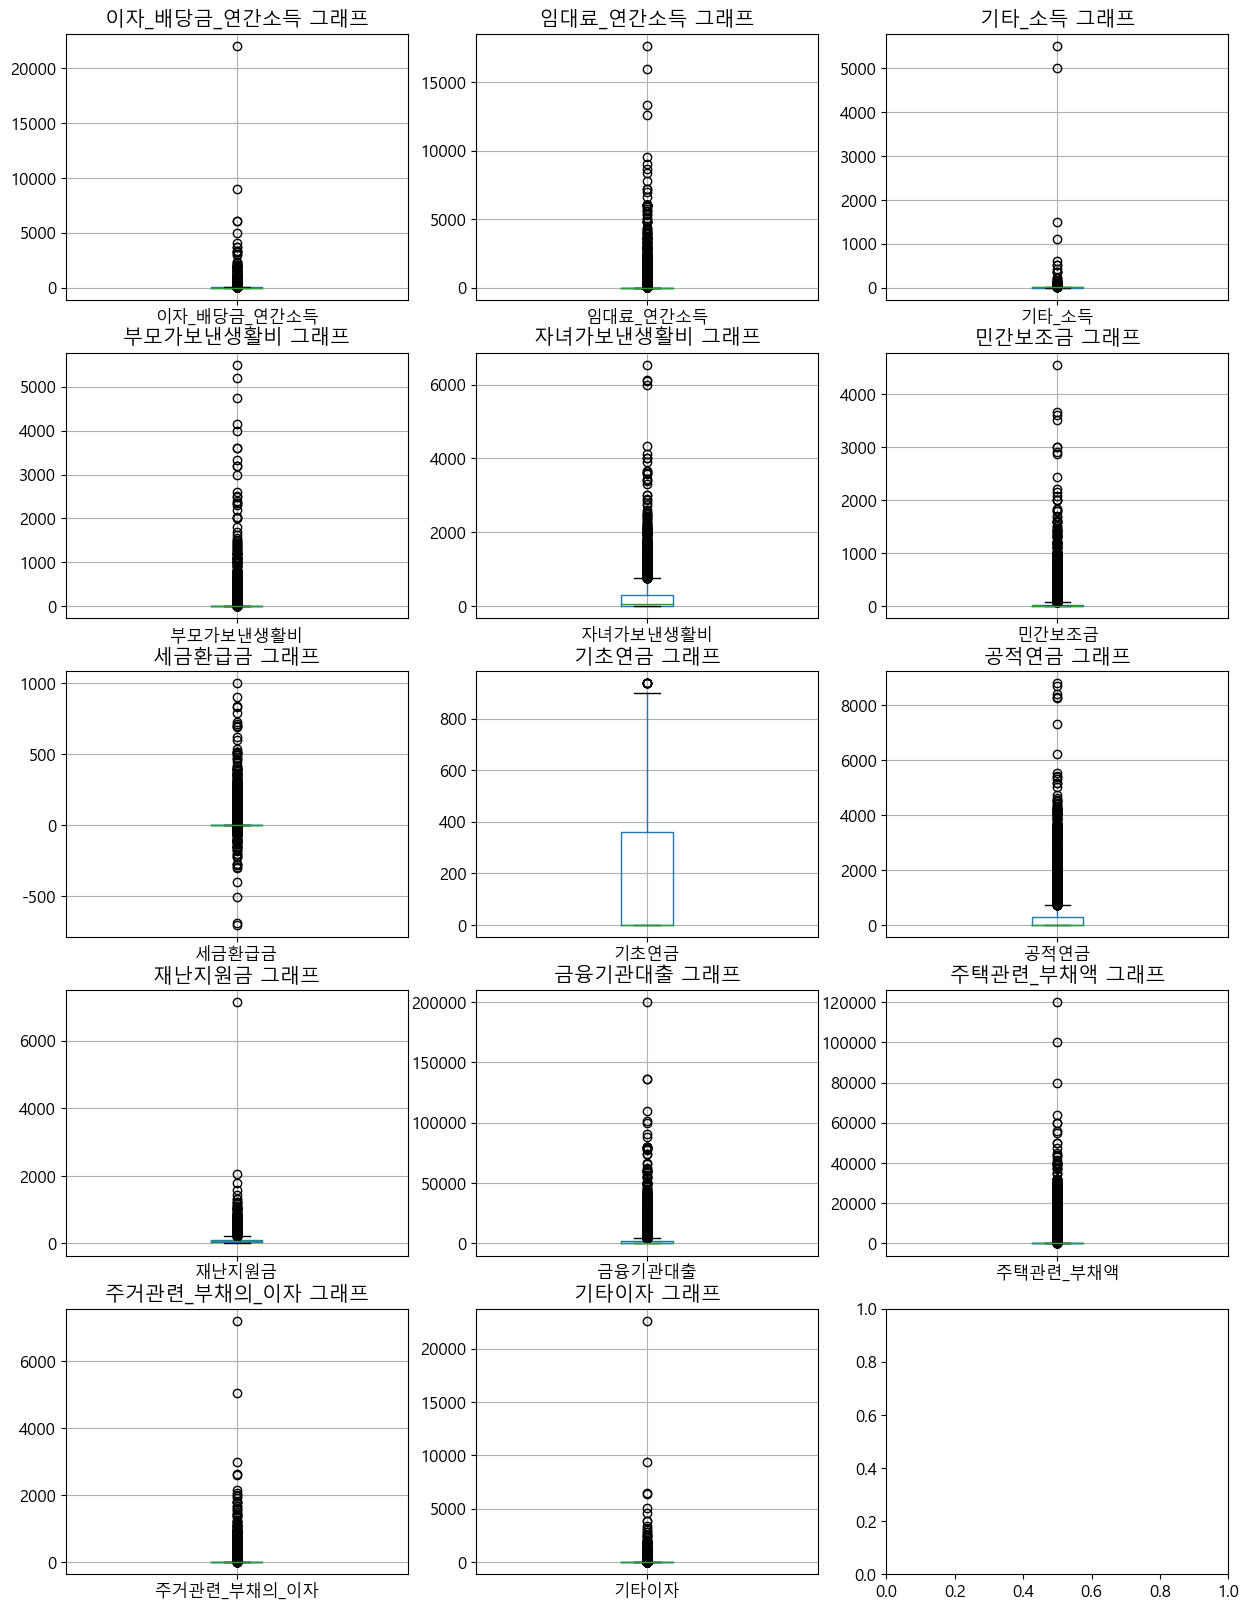

In [16]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    re_df1.boxplot(column=c, ax=ax[row, col])
    ax[row, col].set_title(f"{c} 그래프")
    plt.grid()
plt.show()

#### #boxplot 시각화 결과

1) 종속변수(총생활비)에서 1건만 비정상적으로 높은 수치를 제거하고 진행.
2) 독립변수들 중 이상치는 주관적 판단으로 범위를 선정 후 제거하기로 결정.

### #이상치 행 제외하고 재조회

In [17]:
#이상치 행 제외하고 재조회
df2=re_df1.query('(총생활비 < 100000) and (이자_배당금_연간소득 < 20000) and (기타_소득 < 4900) and \
                 (금융기관대출 < 190000) and (재난지원금 < 7000)')
df2.head()

,총생활비,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,275,0.0,0,7.0,0.0,500,360.0,0.0,0,0,25,10000,0.0,0,350.0
1,239,0.0,0,7.0,0.0,380,10.0,0.0,360,0,20,0,0.0,0,0.0
2,156,0.0,80,7.0,0.0,0,285.0,0.0,360,540,20,14000,20500.0,720,0.0
3,541,140.0,0,9.0,0.0,0,20.0,0.0,576,0,125,0,0.0,0,0.0
4,85,50.0,0,7.0,0.0,420,3.0,0.0,360,0,35,0,0.0,0,0.0


In [18]:
# 가구 수가 7859건으로 변경 된것을 알 수 있다.

In [19]:
# 이상치 데이터 제거후 추세선이 올라오는지 regplot으로 그래프 재확인
# boxplot은 이상치가 계속 표시될 것이기 때문에 넘어감

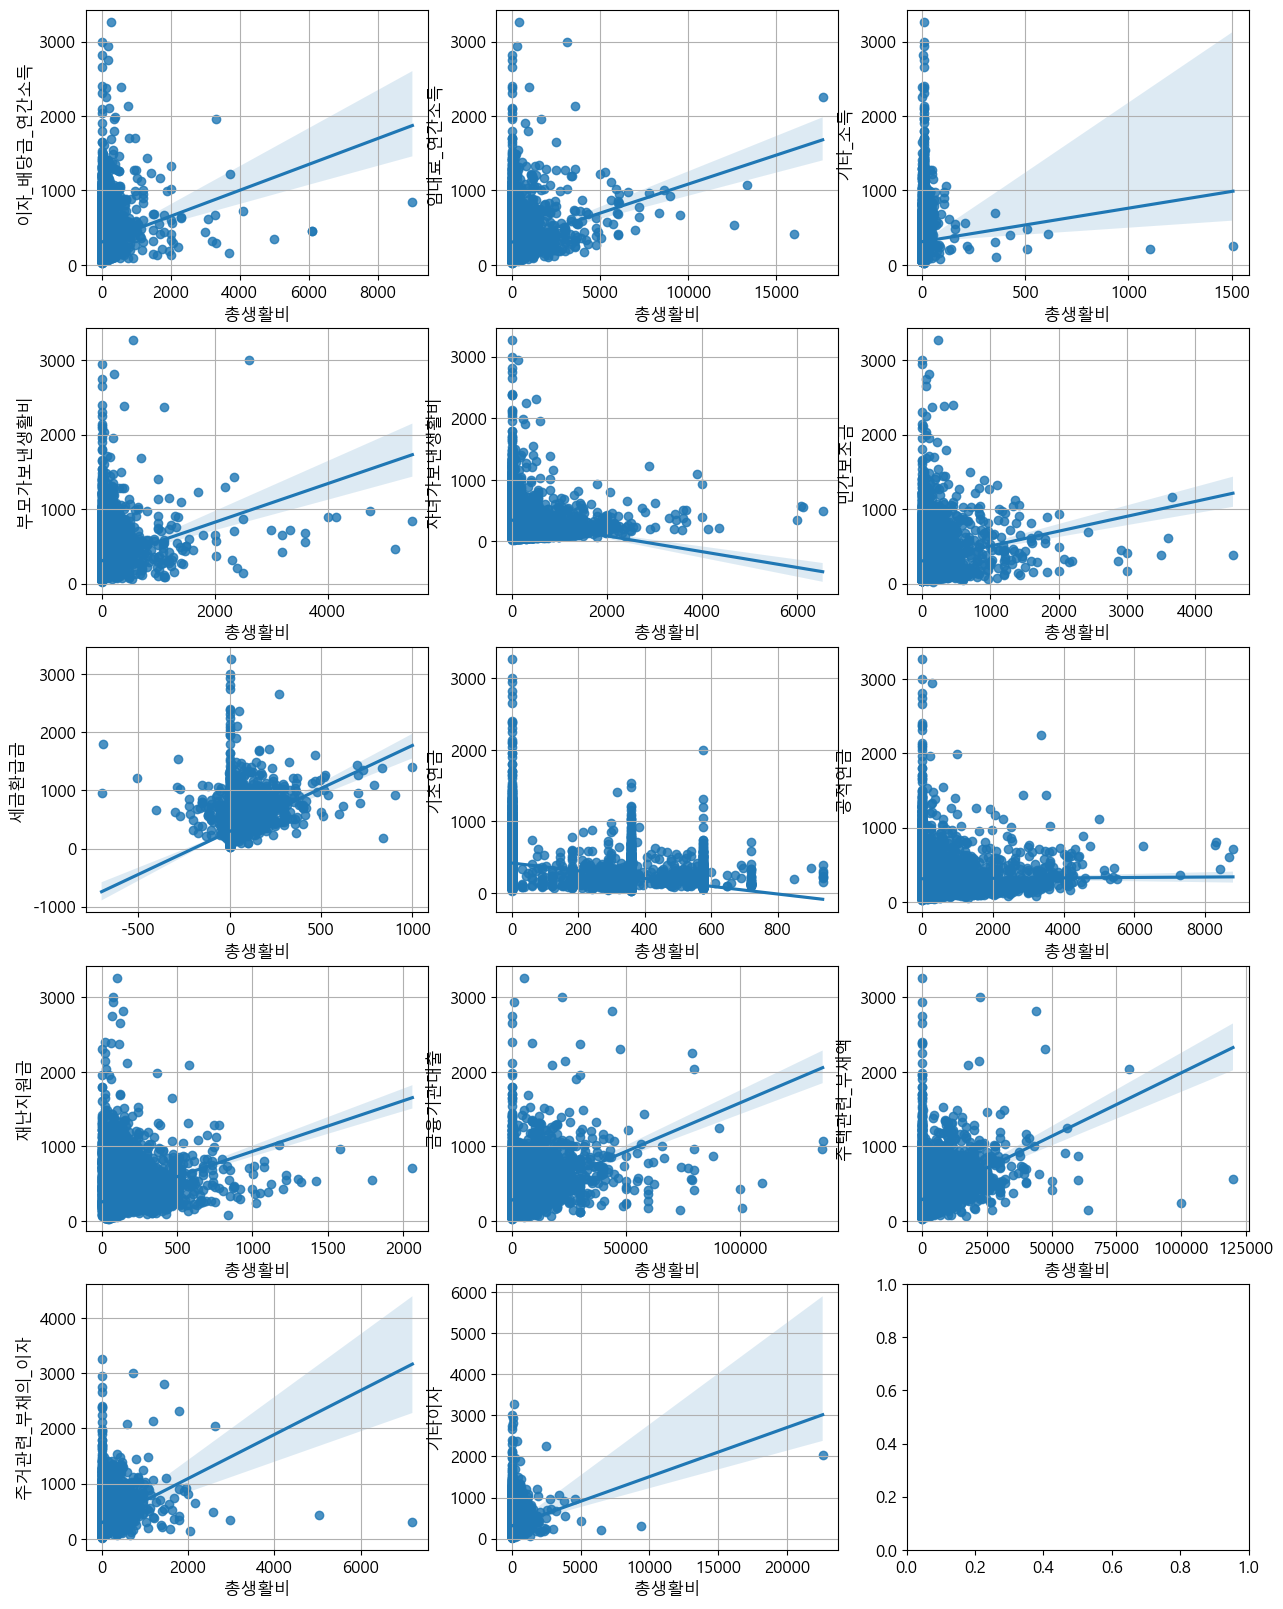

In [20]:
# index = 0부터 시작하면 '총생활비'-'총생활비' 그래프도 그리려고 시도함
columns = list(df2.columns)[1:]

# 4행 2열로 8개의 서브플롯 그래프 그리기
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

# 종속변수 설정
dependent_variable = '총생활비'

for i, c in enumerate(columns):
    row, col = divmod(i, 3)
    sb.regplot(data=df2, y=dependent_variable, x=c, ax=ax[row, col])
    ax[row, col].set_xlabel(dependent_variable)
    ax[row, col].set_ylabel(c)
    ax[row, col].grid()

plt.show()
plt.close()

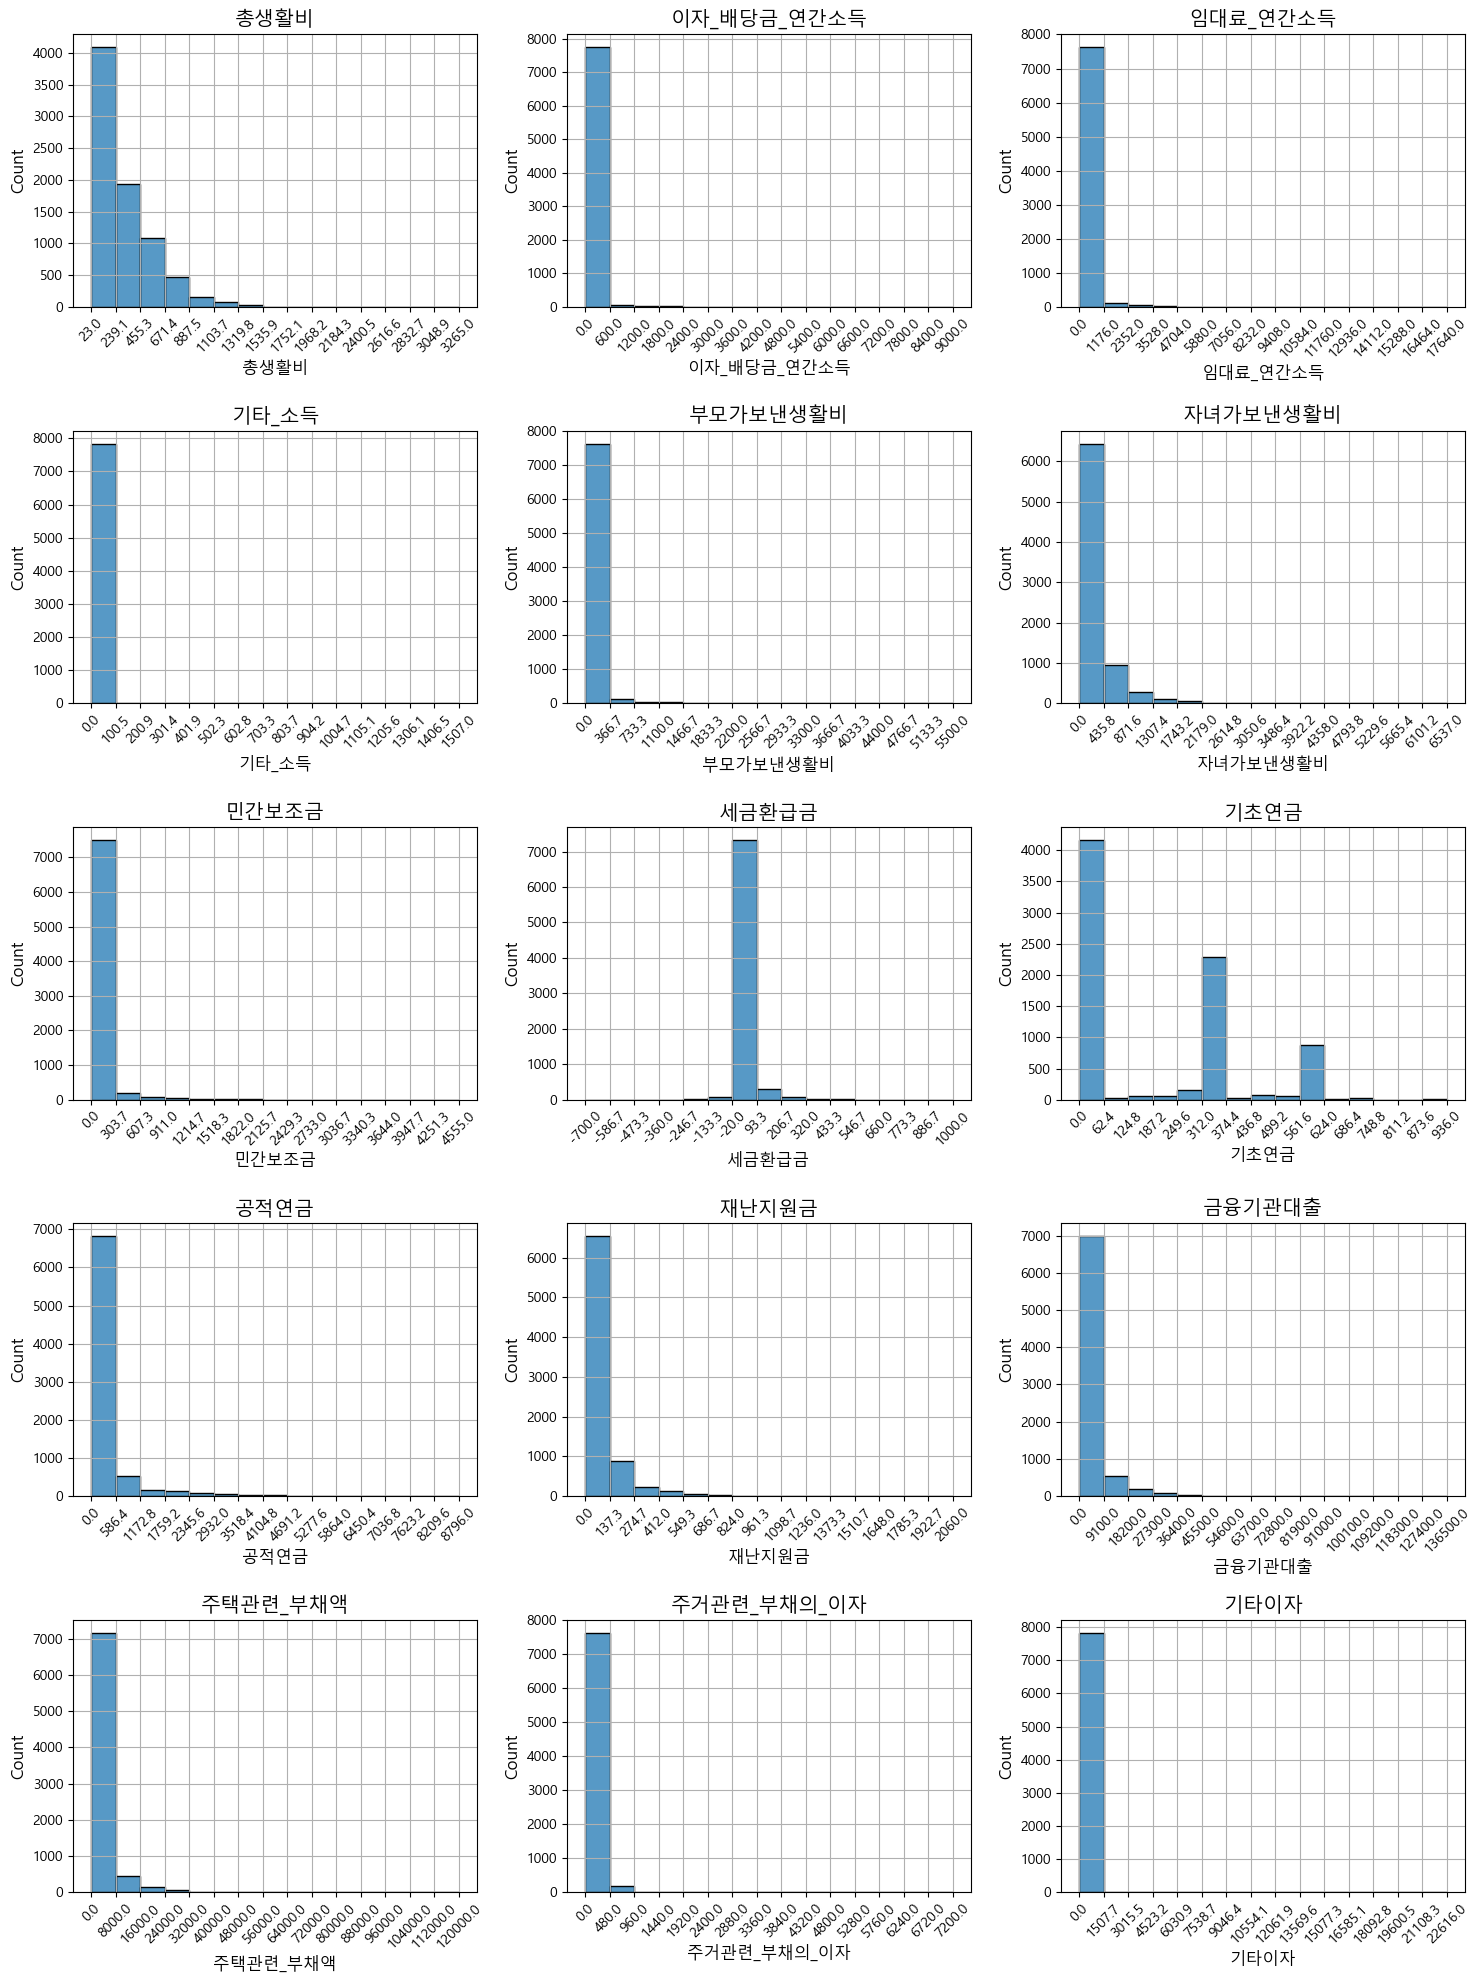

In [21]:
# 데이터 분포가 이전보다 나아졌는지 히스토그램 그래프로 재확인

num_bins = 15  # 히스토그램 구간 개수
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for ax, column in zip(axes.flat, df2.columns):
    hist, bins = np.histogram(df2[column], bins=num_bins)
    bins2 = np.round(bins, 1)

    sb.histplot(data=df2, x=column, bins=num_bins, kde=False, ax=ax)
    ax.set_title(column)  # 각 subplot의 제목 설정
    ax.set_xticks(bins2)  # x축 눈금 설정
    ax.set_xticklabels(bins2, rotation=45, fontsize=10)  # x축 눈금 라벨 설정 (각도 45도)
    ax.yaxis.set_tick_params(labelsize=10) #y축 폰트 사이즈 설정
    ax.grid(True)

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

#### #이상치 처리 결과

이전보다 분포도가 조금 나아졌음을 확인

총생활비의 경우 절반 이상의 가구가 월 239만원 이하에 분포되어 있음을 알 수 있다.

## #신뢰구간

- 모집단: 대한민국 전체 가구 
- 모수: 대한민국 전체 가구 당 해당 엑셀파일의 종속,독립 변수들 수치
- 표본: 모집단의 일부(ex: 대한민국 전체가구 중 7830가구 선발)
- 통계량: 표본 7830가구의 월 평균 총생활비

>신뢰구간을 구함으로 대한민국 전체 가구 모수의 종속변수, 독립변수 추정값 범위를 추측하는 데에 의미가 있다고 판단.

In [22]:
df2Col = list(df2.columns)
# df2Col
for cc in df2Col:
    print("%s 신뢰구간95%%"%cc)
    helper.getConfidenceInterval(df2["%s"%cc])
    # print('\n')

총생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    309.149 |
| 상한 |    321.099 |
+------+------------+
이자_배당금_연간소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |     47.332 |
| 상한 |    58.1386 |
+------+------------+
임대료_연간소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |     114.97 |
| 상한 |    143.471 |
+------+------------+
기타_소득 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    6.53954 |
| 상한 |    7.70112 |
+------+------------+
부모가보낸생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    41.0606 |
| 상한 |    50.7401 |
+------+------------+
자녀가보낸생활비 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    221.624 |
| 상한 |    239.844 |
+------+------------+
민간보조금 신뢰구간95%
+------+------------+
|      |   신뢰구간 |
|------+------------|
| 하한 |    53.7174 |
| 상한 |    62.6844 |
+------+------------+
세금환급금 신뢰구간95%
+-----

### #신뢰구간 시각화

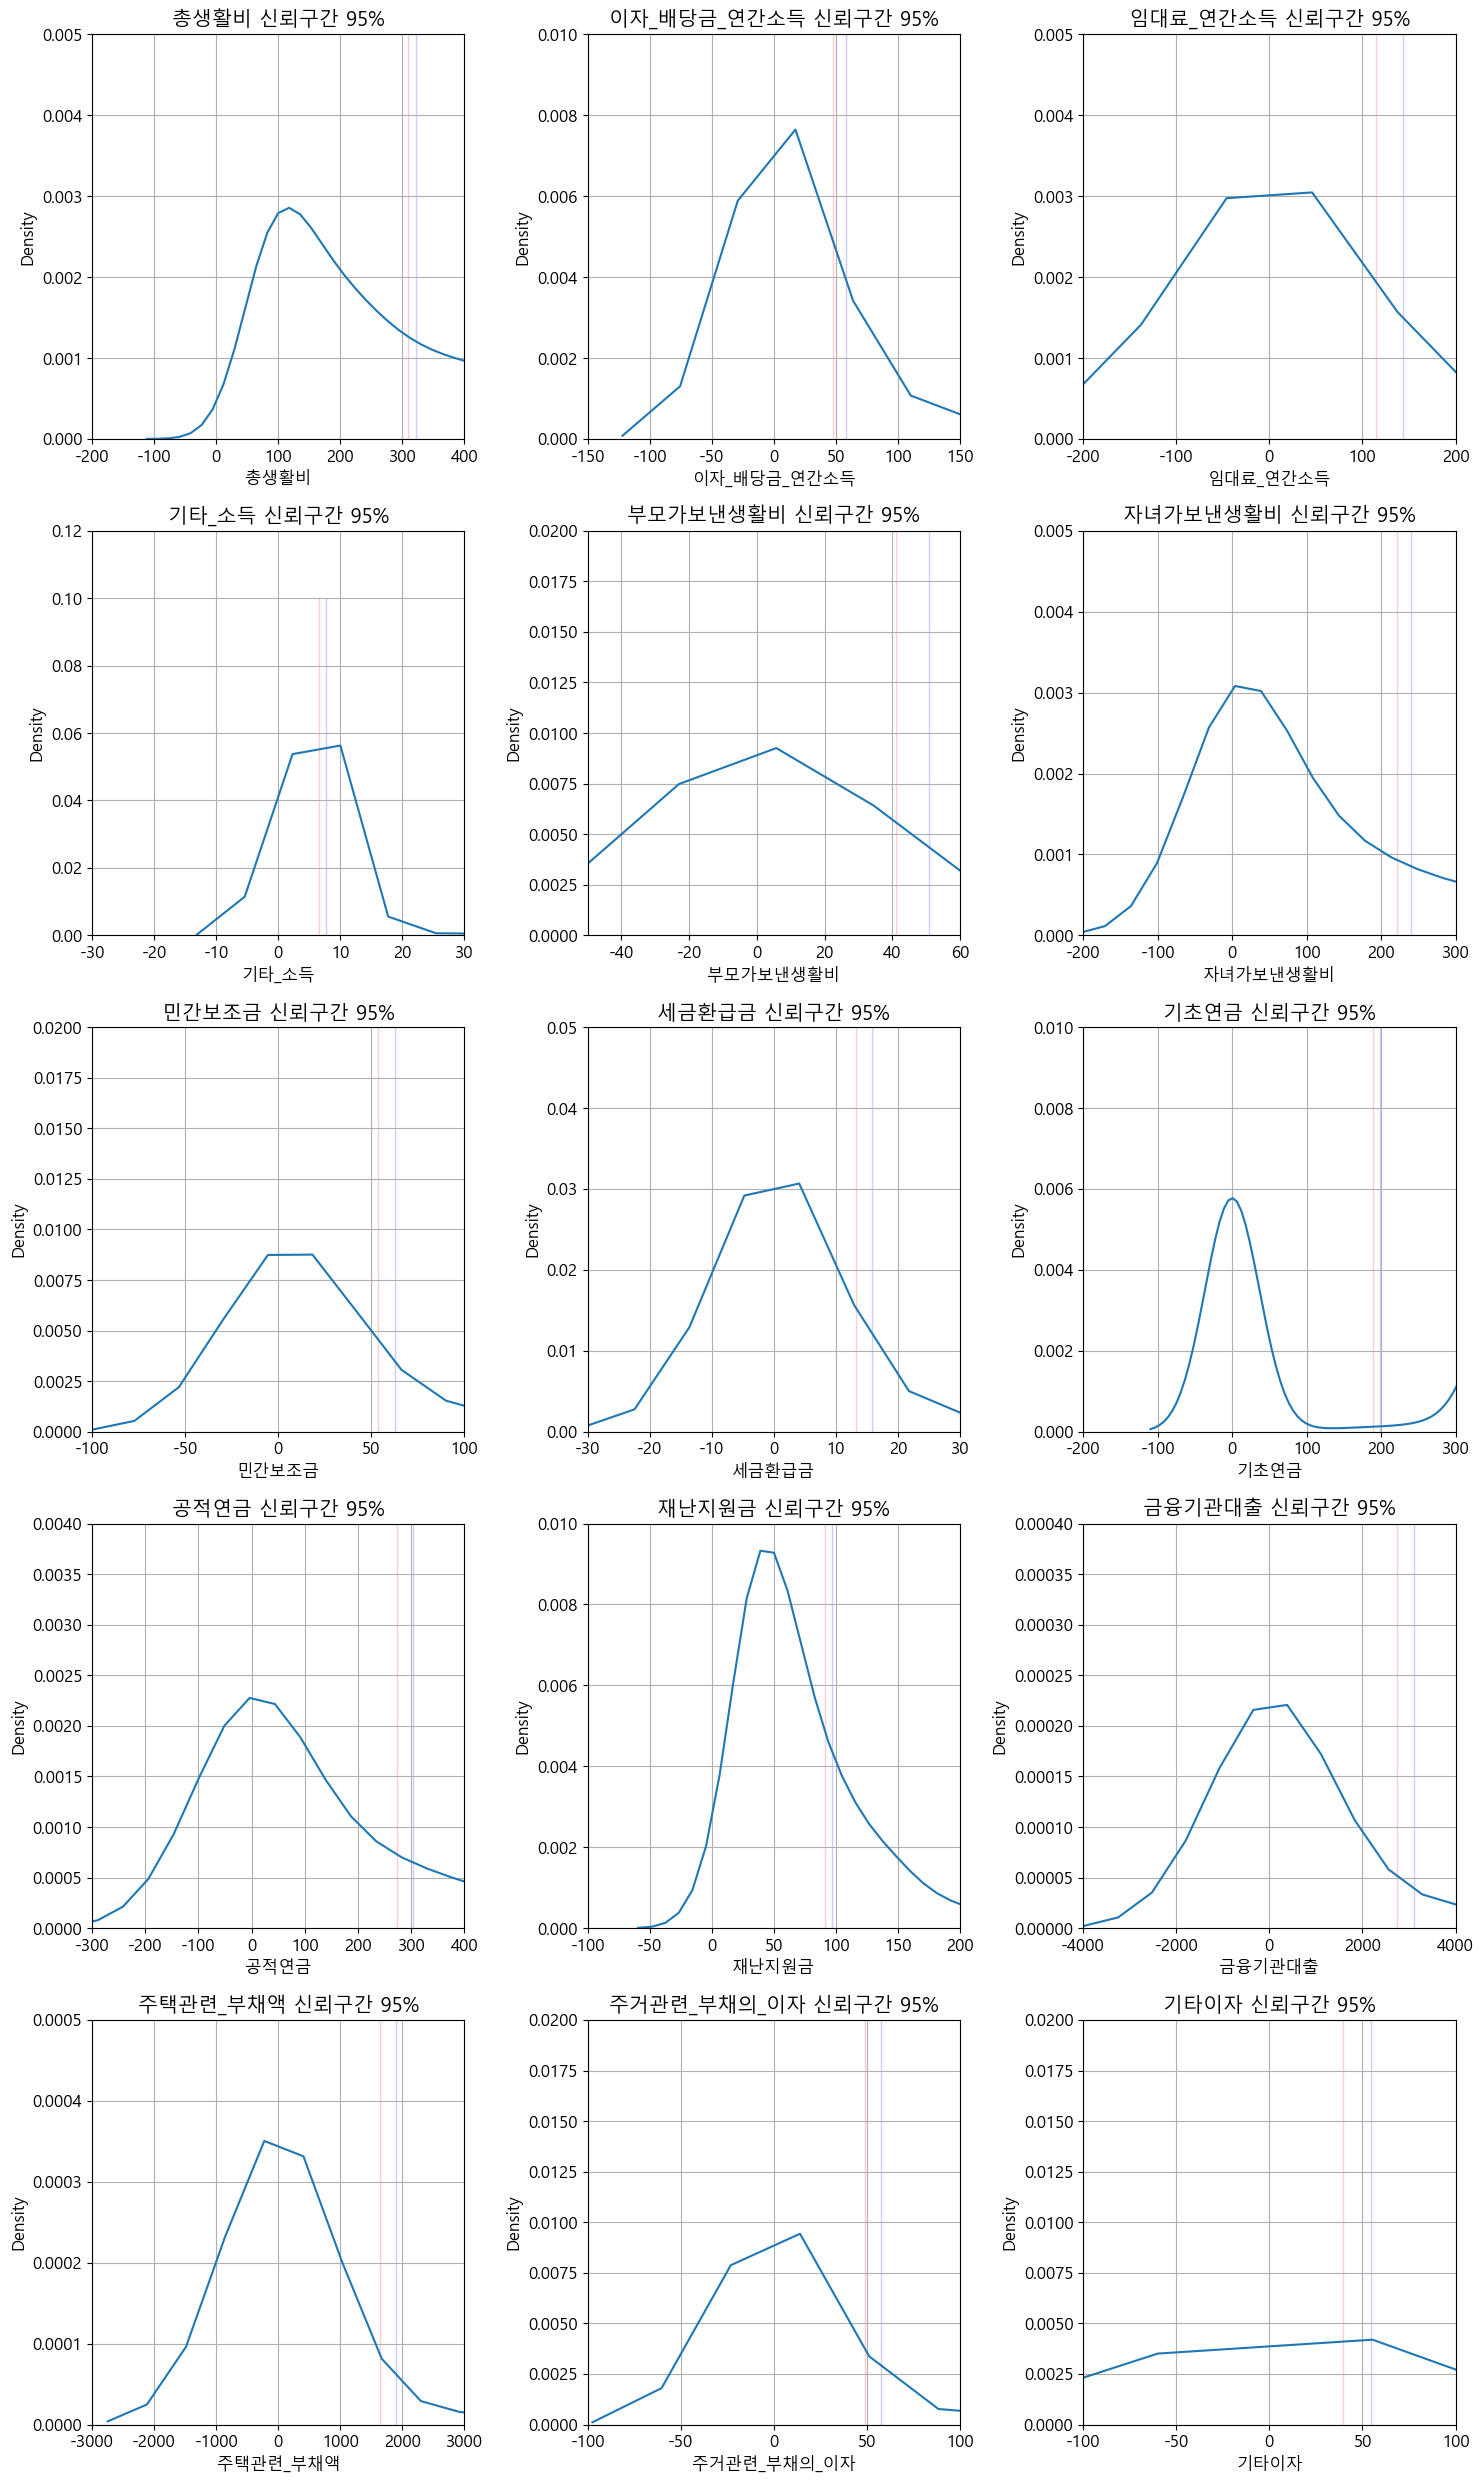

In [23]:
# # 신뢰구간을 그래프로 시각화 해보기

# 변수명 리스트 생성
variables = df2.columns

# 각 변수별 x, y 범위 정의
x_ranges = {
    '총생활비': (-200,400),
    '이자_배당금_연간소득': (-150,150),
    '임대료_연간소득': (-200,200),
    '기타_소득': (-30,30),
    '부모가보낸생활비':(-50, 60),
    '자녀가보낸생활비':(-200, 300),
    '민간보조금':(-100, 100),
    '세금환급금': (-30,30),
    '기초연금':(-200, 300),
    '공적연금': (-300,400),
    '재난지원금': (-100, 200),
    '금융기관대출': (-4000,4000),
    '주택관련_부채액': (-3000,3000),
    '주거관련_부채의_이자': (-100,100),
    '기타이자': (-100, 100)
}

y_ranges = {
    '총생활비': (0,0.005),
    '이자_배당금_연간소득': (0,0.01),
    '임대료_연간소득': (0,0.005),
    '기타_소득': (0,0.12),
    '부모가보낸생활비': (0, 0.02),
    '자녀가보낸생활비': (0, 0.005),
    '민간보조금': (0, 0.02),
    '세금환급금': (0,0.05),
    '기초연금': (0, 0.01),
    '공적연금': (0, 0.004),
    '재난지원금': (0, 0.01),
    '금융기관대출': (0,0.0004),
    '주택관련_부채액': (0,0.0005),
    '주거관련_부채의_이자': (0,0.02),
    '기타이자': (0, 0.02)
}

# 신뢰구간 계산
confidence_level = 0.95
confidence_intervals = {}  # 각 변수별 신뢰구간을 저장할 딕셔너리

for var in variables:
    sample = df2[var]
    n = len(sample)
    sample_mean = sample.mean()
    sample_std = sample.std(ddof=1)
    std_error = sample_std / sqrt(n)
    
    t_value = t.ppf((1 + confidence_level) / 2, df=n-1)
    margin_of_error = t_value * std_error
    
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    confidence_intervals[var] = (lower_bound, upper_bound)

# subplot 설정
num_rows = (len(variables) + 2) // 3  # 3열로 subplot 배치
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# 신뢰구간 시각화
for ax, var in zip(axes.flat, variables):
    cmin, cmax = confidence_intervals[var]  # 하한과 상한
    
    sb.kdeplot(data=df2, x=var, ax=ax)
    sb.lineplot(x=[cmin, cmin], y=[0, 0.1], color='red', ax=ax)
    sb.lineplot(x=[cmax, cmax], y=[0, 0.1], color='blue', ax=ax)
    ax.set_title(f'{var} 신뢰구간 95%')
    ax.set_xlim(x_ranges[var])  # x축 범위 확장
    ax.set_ylim(y_ranges[var])  # y축 범위 설정
    ax.grid(True)  # 격자 표시

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

### #산점도 행렬 그래프로 각 요인(변수)들간에 상관관계가 있는지 확인

In [24]:
# # 산점도 행렬 그래프로 각 요인(변수)들간에 상관관계가 있는지 확인

# plt.figure(figsize=(30, 20))
# sb.pairplot(data=df2, vars=columns, kind='reg')
# plt.show()
# plt.close()

#### #그래프 시각화
![img](output.png)

#### #결과

확인 결과 시간도 오래 걸리고 그래프가 작아 보기가 힘들다

## #정규분포 가정 구하기(정규성 검사)

대량의 데이터를 사용한다는 가정으로 일반적인 정규성 검정 진행하지 않기로 계획.

차선책으로 왜도와 첨도를 구해 정규분포를 따르는지 확인.

### #1. 왜도

분포의 비대칭도.

| 구분 | 내용 |
|---|---|
| 정규분포 | $왜도=0$ |
| 왼쪽으로 치우침 | $왜도 > 0$ |
| 오른쪽으로 치우침 | $왜도 < 0$ |

종속변수인 총생활비는 제외

종속변수는 분석의 대상이 되는 특별한 변수

종속변수의 분포 특성을 파악하는 것은 회귀분석 같은 다른 분석 기법으로 처리될 수 있기 때문

### #2. 첨도

확률분포의 뾰족한 정도.

Fisher = True 

   - 첨도 기준이 Fisher (normal ==> 0.0) 이다.
   - 정규분포의 첨도 = 0이다. 


| 구분 | 내용 |
|---|---|
| 정규분포 | $첨도 = 0$ |
| 위로 뾰족함 | $첨도 > 0$ |
| 아래로 뾰족함 | $첨도 < 0$ |

첨도 구하기.종속변수인 총생활비는 제외

이유는 상기 왜도와 같음

In [25]:
# 왜도와 첨도를 하나의 데이터프레임으로 추출
SkewKurtosis_df = DataFrame(columns=['변수명', '정규분포 왜도', '정규분포 첨도'])
for column in df2.columns:
    if column != '총생활비':
        skewness = skew(df2[column])
        kurtosisness = kurtosis(df2[column],fisher=True)
        SkewKurtosis_df = pd.concat(
            [SkewKurtosis_df, DataFrame({'변수명': [column],
            '정규분포 왜도': [skewness.round(3)], 
            '정규분포 첨도': [kurtosisness.round(3)]})], ignore_index=True
        )
SkewKurtosis_df
# 데이터프레임을 생성했으나 글씨가 우측으로 몰려있음

,변수명,정규분포 왜도,정규분포 첨도
0,이자_배당금_연간소득,16.080,398.172
1,임대료_연간소득,11.470,199.716
2,기타_소득,38.127,1832.707
3,부모가보낸생활비,12.077,204.786
4,자녀가보낸생활비,4.408,36.134
5,민간보조금,8.621,110.507
6,세금환급금,5.110,60.736
7,기초연금,0.517,-1.189
8,공적연금,4.467,28.361
9,재난지원금,4.887,38.836


In [26]:
# 데이터프레임의 셀 글자를 가운데 정렬 및 소수 셋째 자리까지만 표현하도록 유도
styled_df = SkewKurtosis_df.style.set_properties(**{'text-align': 'center'})\
                                .set_table_styles([
                                    {'selector': 'th.col_heading', 'props': [('text-align', 'center')]}])\
                                .format({'정규분포 왜도': '{:.3f}', '정규분포 첨도': '{:.3f}'})
styled_df

,변수명,정규분포 왜도,정규분포 첨도
0,이자_배당금_연간소득,16.080,398.172
1,임대료_연간소득,11.470,199.716
2,기타_소득,38.127,1832.707
3,부모가보낸생활비,12.077,204.786
4,자녀가보낸생활비,4.408,36.134
5,민간보조금,8.621,110.507
6,세금환급금,5.110,60.736
7,기초연금,0.517,-1.189
8,공적연금,4.467,28.361
9,재난지원금,4.887,38.836


#### #왜도 검사 결과

- 기초연금을 제외한 나머지 독립변수 분포는 정규분포를 따르지 않는다고 판단.
- 각 변수의 왜도값이 0보다 커 위쪽으로 뾰족하다는 것은 데이터가 특정 값에 치우쳐 있다는 것을 의미.
- 다만, 기초통계량을 보면 알 수 있듯 각 변수의 수치값 편차가 크고 최소값이 "0"인 경우가 많음.
- 해당 데이터는 국민들을 대상으로 한 실제 데이터 값이기 때문에 정규분포를 따르지 않을 수 있음을 염두해야 한다고 판단됨.

#### #첨도 검사 결과

- 기초연금을 제외한 나머지 독립변수 분포는 정규분포를 따르지 않음을 확인.
- 각 변수의 첨도값이 0보다 크므로 위쪽으로 뾰족하다는 것을 의미함.
- 다만, 기초통계량(describe) 확인 시 각 변수 별 수치의 편차가 크고 최소값이 "0"인 경우가 많음.
- 해당 데이터는 국민들을 대상으로 한 실제 기반의 데이터이기 때문에 정규분포를 따르지 않을 수 있음을 염두해야 할 것으로 판단됨.

### #3. 스피어만 상관분석 및 히트맴

왜도,첨도 검사 결과 독립 변수 하나를 제외한 나머지는 전부 정규분포를 따르지 않음을 확인.

비선형적 관계, 정규분포를 따르지 않기 때문에 상관관계를 확인하기 위해 스피어만 상관분석을 이용.

히트맵 그래프로 요인들간에 상관관계 정도를 확인.

In [27]:
helper.spearman_r(df2)

,statistic,pvalue,result
fields,,,
총생활비 vs 이자_배당금_연간소득,0.214765,1.136305e-82,True
이자_배당금_연간소득 vs 임대료_연간소득,0.175856,1.292815e-55,True
임대료_연간소득 vs 기타_소득,0.099732,7.854510e-19,True
기타_소득 vs 부모가보낸생활비,0.120537,7.929718e-27,True
부모가보낸생활비 vs 자녀가보낸생활비,-0.467324,0.000000e+00,True
자녀가보낸생활비 vs 민간보조금,-0.153996,6.558783e-43,True
민간보조금 vs 세금환급금,0.110892,6.234430e-23,True
세금환급금 vs 기초연금,-0.278614,4.426175e-140,True
기초연금 vs 공적연금,0.193484,3.711177e-67,True


In [28]:
corr = df2.corr(method='spearman')
# corr.head()

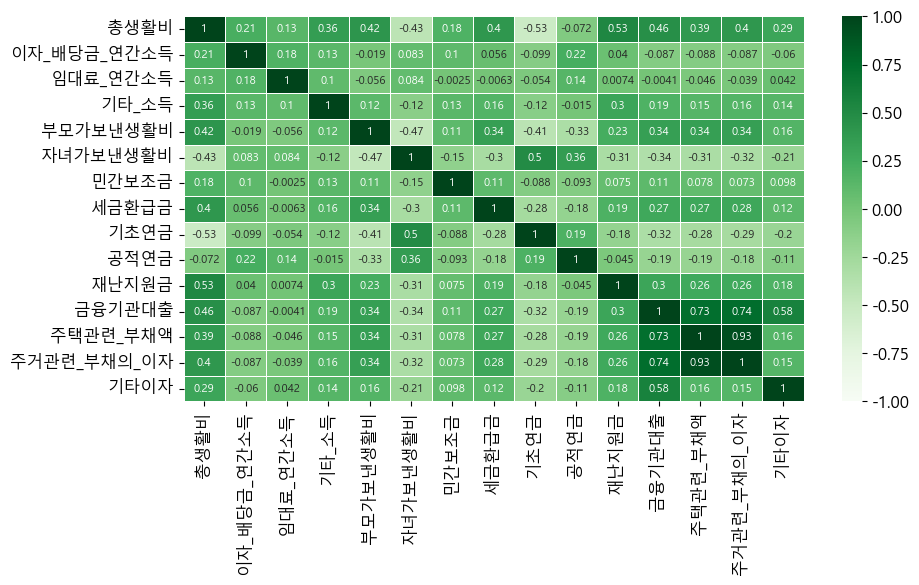

In [29]:
plt.rcParams["figure.figsize"] = (10,5)

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상(Greys,Purples,Blues,Greens,Oranges,Reds,OrRd,PuRd,RdPu,BuPu,GnBu,PuBu,YlGnBu,PuBuGn,BuGn,YlGn)
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5, #구분선 굵기
           annot_kws={"size": 8}  # 글자 크기 조정
)

plt.show()
plt.close()

#### #히트맵 결과1

`금융기관대출`, `주택관련_부채액`, `주거관련_부채의_이자가` 높은 상관성을 나타내는 것을 확인.

해당 변수를 제거 후 heat 맵을 사용해 상관관계 개선이 되는지 확인

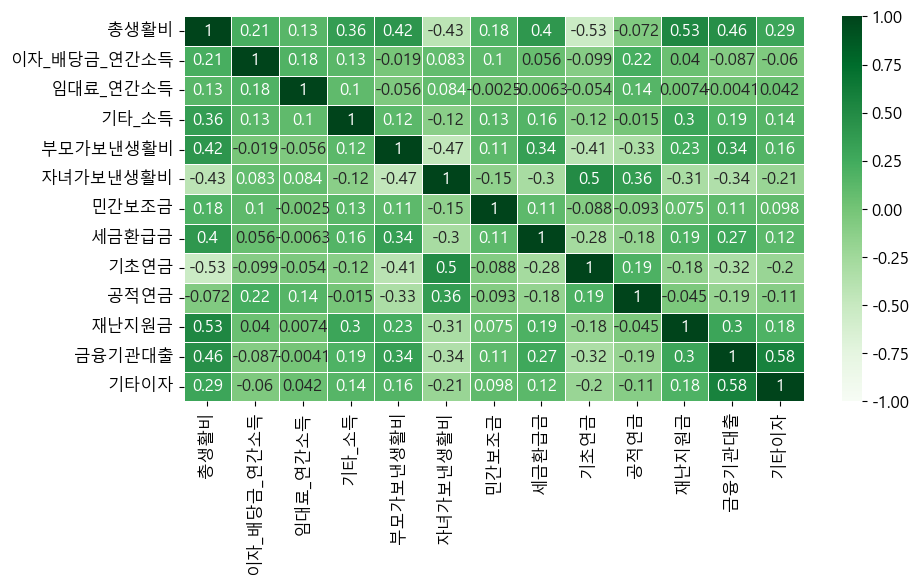

In [30]:
# 종속변수를 포함한 회귀분석 후 상관관계 나타나는 변수들 제외 후 다시 분석
# `금융기관대출`이 높은 상관관계를 보였지만 `주택관련_부채액`, `주거관련_부채의_이자`을 제외한 후 상관분석을 진행하였더니
# 상관계수가 개선되었으므로 금융기관대출은 제외하지 않기로 함
# df2_std_filtered2 = df2_std_filtered.drop(['금융기관대출'],axis = 1)


df2_filtered = df2.drop(['주택관련_부채액'],axis = 1)
df2_filtered2 = df2_filtered.drop(['주거관련_부채의_이자'],axis = 1)

sb.heatmap(df2_filtered2.corr(method='spearman'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

In [31]:
helper.spearman_r(df2_filtered2)

,statistic,pvalue,result
fields,,,
총생활비 vs 이자_배당금_연간소득,0.214765,1.136305e-82,True
이자_배당금_연간소득 vs 임대료_연간소득,0.175856,1.292815e-55,True
임대료_연간소득 vs 기타_소득,0.099732,7.854510e-19,True
기타_소득 vs 부모가보낸생활비,0.120537,7.929718e-27,True
부모가보낸생활비 vs 자녀가보낸생활비,-0.467324,0.000000e+00,True
자녀가보낸생활비 vs 민간보조금,-0.153996,6.558783e-43,True
민간보조금 vs 세금환급금,0.110892,6.234430e-23,True
세금환급금 vs 기초연금,-0.278614,4.426175e-140,True
기초연금 vs 공적연금,0.193484,3.711177e-67,True


In [32]:
helper.spearman_r(df2)

,statistic,pvalue,result
fields,,,
총생활비 vs 이자_배당금_연간소득,0.214765,1.136305e-82,True
이자_배당금_연간소득 vs 임대료_연간소득,0.175856,1.292815e-55,True
임대료_연간소득 vs 기타_소득,0.099732,7.854510e-19,True
기타_소득 vs 부모가보낸생활비,0.120537,7.929718e-27,True
부모가보낸생활비 vs 자녀가보낸생활비,-0.467324,0.000000e+00,True
자녀가보낸생활비 vs 민간보조금,-0.153996,6.558783e-43,True
민간보조금 vs 세금환급금,0.110892,6.234430e-23,True
세금환급금 vs 기초연금,-0.278614,4.426175e-140,True
기초연금 vs 공적연금,0.193484,3.711177e-67,True


In [33]:
df2_removed_names =['이자_배당금_연간소득','임대료_연간소득','기타_소득','부모가보낸생활비','자녀가보낸생활비','민간보조금','세금환급금','금융기관대출','기타이자','기초연금','공적연금','재난지원금']
result = helper.myOls(df2, x=df2_removed_names, y="총생활비")
result.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총생활비   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     422.2
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:23:04   Log-Likelihood:                -53197.
No. Observations:                7859   AIC:                         1.064e+05
Df Residuals:                    7846   BIC:                         1.065e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     285.2447      4.694     60.764      0.000     276.043     294.447
이자_배당금_연간소득     0.0996      0.010     10.112      0.000       0.080       0.119
임대료_연간소득        0.0357      0.004      9.276      0.000       0.028       0.043
기타_소득           0.1581      0.091      1.744      0.081      -0.020       0.336
부모가보낸생활비        0.1194      0.011     10.699      0.000       0.098       0.141
자녀가보낸생활비       -0.0169      0.006     -2.758      0.006      -0.029      -0.005
민간보조금           0.1147      0.012      9.703      0.000       0.092       0.138
세금환급금           0.9534      0.041     23.159      0.000       0.873       1.034
금융기관대출          0.0069      0.000     19.370      0.000       0.006       0.008
기타이자            0.0111      0.008      1.474      0.140      -0.004       0.026
기초연금           -0.3339      0.012    -27.753      0.000      -0.357      -0.310
공적연금            0.0057      0.004      1.569      0.117      -0.001       0.013
재난지원금           0.4163      0.021     20.164      0.000       0.376       0.457
==============================================================================
Omnibus:                     5439.291   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171168.607
Skew:                           2.901   Prob(JB):                         0.00
Kurtosis:                      25.115   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### #히트맵 결과(최종)

- 변수 제거 후 상관계수가 개선됨을 확인.
    - 다만 주성분분석(PCA)분석 이후 제거 여부를 결정하기로 확정.

- 일부 독립변수간에 상관관계가 존재함을 확인.
- 전체적으로 양의 상관관계를 띄고 있으나 소수의 그렇지 않은 관계를 확인.
- 총생활비-기초연금간, 총생활비-자녀가보낸생활비 간에는 비교적 강한 음의 상관관계가 존재함을 확인.
    - 이는 기초연금, 자녀가보낸생활비 액수가 증가 할수록 총생활비가 낮아진다는 것을 의미.
- 금융기관대출-주택관련부채액-주거관련부채의이자 간에 상관관계가 있음을 확인할 수 있다.
    - 다만 이 부분은 대출액이 커질수록 이자도 당연히 커지기 때문에 합리적이라고 볼 수 있다.

## #(주성분분석)PCA분석

dtypes가 category가 아닌 변수만 추출(분산분석은 카테고리가 지원되지 않기 때문)

In [34]:
cnames = []
dtypes = df2.dtypes

for i, v in enumerate(dtypes):
    if v != 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

총생활비 int64
이자_배당금_연간소득 float64
임대료_연간소득 int64
기타_소득 float64
부모가보낸생활비 float64
자녀가보낸생활비 int64
민간보조금 float64
세금환급금 float64
기초연금 int64
공적연금 int64
재난지원금 int64
금융기관대출 int64
주택관련_부채액 float64
주거관련_부채의_이자 int64
기타이자 float64
['총생활비', '이자_배당금_연간소득', '임대료_연간소득', '기타_소득', '부모가보낸생활비', '자녀가보낸생활비', '민간보조금', '세금환급금', '기초연금', '공적연금', '재난지원금', '금융기관대출', '주택관련_부채액', '주거관련_부채의_이자', '기타이자']


### #데이터 정규화-표준화(scaling)

In [35]:
# 데이터 정규화 진행

x_train_std_df, y_train_std_df = helper.scalling(df2[cnames], '총생활비')
x_train_std_df.head()

,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자
0,-0.215825,-0.200522,-0.004582,-0.209725,0.653613,1.488536,-0.242354,-0.880946,-0.427626,-0.580214,0.888392,-0.320955,-0.272759,0.861872
1,-0.215825,-0.200522,-0.004582,-0.209725,0.362327,-0.237737,-0.242354,0.757655,-0.427626,-0.622254,-0.367689,-0.320955,-0.272759,-0.133894
2,-0.215825,-0.076379,-0.004582,-0.209725,-0.560079,1.118621,-0.242354,0.757655,0.372241,-0.622254,1.390825,3.401969,3.415518,-0.133894
3,0.357141,-0.200522,0.071568,-0.209725,-0.560079,-0.188415,-0.242354,1.740816,-0.427626,0.260578,-0.367689,-0.320955,-0.272759,-0.133894
4,-0.011194,-0.200522,-0.004582,-0.209725,0.459423,-0.272263,-0.242354,0.757655,-0.427626,-0.496135,-0.367689,-0.320955,-0.272759,-0.133894


In [36]:
# # 표준화 결과를 활용하여 주성분 분석 수행
model = pca()
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]


[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,금융기관대출,0.491171,best
1,PC2,자녀가보낸생활비,0.497598,best
2,PC3,공적연금,0.567770,best
3,PC4,기타_소득,0.758736,best
4,PC5,세금환급금,-0.454537,best
5,PC6,민간보조금,-0.635869,best
6,PC7,재난지원금,-0.509041,best
7,PC8,공적연금,-0.540182,best
8,PC9,부모가보낸생활비,0.771742,best
9,PC10,이자_배당금_연간소득,0.454611,best


### #중간 결과

앞서 히트맵에서 높은 상관성을 가진 `임대료_연간소득`, `주택관련_부채액`, `주거관련_부채의_이자`가 `weak` 요인으로 확인.

이 중 `주택관련_부채액`, `주거관련_부채의_이자` 변수를 제거 후 진행하기로 결정

In [37]:
# # 주성분 선정
best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
best_names

['세금환급금',
 '민간보조금',
 '공적연금',
 '이자_배당금_연간소득',
 '재난지원금',
 '기초연금',
 '금융기관대출',
 '자녀가보낸생활비',
 '기타_소득',
 '기타이자',
 '부모가보낸생활비']

In [38]:
# target_names 변수에 PCA분석을 통한 best값+종속변수를 결합
target_names = best_names + ['총생활비']
target_names

['세금환급금',
 '민간보조금',
 '공적연금',
 '이자_배당금_연간소득',
 '재난지원금',
 '기초연금',
 '금융기관대출',
 '자녀가보낸생활비',
 '기타_소득',
 '기타이자',
 '부모가보낸생활비',
 '총생활비']

In [39]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df3 = merge_df.filter(target_names)
df3.head()

,세금환급금,민간보조금,공적연금,이자_배당금_연간소득,재난지원금,기초연금,금융기관대출,자녀가보낸생활비,기타_소득,기타이자,부모가보낸생활비,총생활비
0,-0.242354,1.488536,-0.427626,-0.215825,-0.580214,-0.880946,0.888392,0.653613,-0.004582,0.861872,-0.209725,-0.148503
1,-0.242354,-0.237737,-0.427626,-0.215825,-0.622254,0.757655,-0.367689,0.362327,-0.004582,-0.133894,-0.209725,-0.281743
2,-0.242354,1.118621,0.372241,-0.215825,-0.622254,0.757655,1.390825,-0.560079,-0.004582,-0.133894,-0.209725,-0.588933
3,-0.242354,-0.188415,-0.427626,0.357141,0.260578,1.740816,-0.367689,-0.560079,0.071568,-0.133894,-0.209725,0.835987
4,-0.242354,-0.272263,-0.427626,-0.011194,-0.496135,0.757655,-0.367689,0.459423,-0.004582,-0.133894,-0.209725,-0.851711


### #PCA분석 결과

PCA 분석을 통해 선정된 주요 요인들

|변수|의미|기타|비고|
|---|---|---|---|
|총생활비|한달에 지출되는 총 생활비|월 / 단위:만원|종속변수|
|이자_배당금_연간소득|은행이자나 주식 배당금으로 얻는 연간 수입|년간 / 단위:만원|불로소득|
|기타_소득|상여금, 장려금, 보상금 등|년간 / 단위:만원|불로소득|
|부모가보낸생활비|부모로부터 받은 보조금(생활비개념)|년간 / 단위:만원|불로소득|
|자녀가보낸생활비|자녀로부터 받은 보조금(생활비개념)|년간 / 단위:만원|불로소득|
|민간보조금|민간 개인 또는 단체로부터 받은 보조금(생활비개념)|년간 / 단위:만원|불로소득|
|세금환급금|납세자가 내야할 세액보다 더 많이 내서 나오는 환급금|년간 / 단위:만원|불로소득|
|기초연금|저소득층 노인에게 지급하는 연금|년간 / 단위:만원|불로소득|
|공적연금|국민연금, 공무원연금, 군인연금, 사립학교교직원연금을 의미|년간 / 단위:만원|불로소득|
|재난지원금|코로나19에 따른 국민생계 안정을 위해 지원하는 금액|년간 / 단위:만원|불로소득|
|금융기관대출|금융권에서 받은 대출액|단위:만원|부채|
|기타_이자|일반 대출이나 기타 사항에 의해 발생한 이자|년간 / 단위:만원|부채|

### #Scaling 후 히트맵 작성

In [40]:
merge_df.head()

,이자_배당금_연간소득,임대료_연간소득,기타_소득,부모가보낸생활비,자녀가보낸생활비,민간보조금,세금환급금,기초연금,공적연금,재난지원금,금융기관대출,주택관련_부채액,주거관련_부채의_이자,기타이자,총생활비
0,-0.215825,-0.200522,-0.004582,-0.209725,0.653613,1.488536,-0.242354,-0.880946,-0.427626,-0.580214,0.888392,-0.320955,-0.272759,0.861872,-0.148503
1,-0.215825,-0.200522,-0.004582,-0.209725,0.362327,-0.237737,-0.242354,0.757655,-0.427626,-0.622254,-0.367689,-0.320955,-0.272759,-0.133894,-0.281743
2,-0.215825,-0.076379,-0.004582,-0.209725,-0.560079,1.118621,-0.242354,0.757655,0.372241,-0.622254,1.390825,3.401969,3.415518,-0.133894,-0.588933
3,0.357141,-0.200522,0.071568,-0.209725,-0.560079,-0.188415,-0.242354,1.740816,-0.427626,0.260578,-0.367689,-0.320955,-0.272759,-0.133894,0.835987
4,-0.011194,-0.200522,-0.004582,-0.209725,0.459423,-0.272263,-0.242354,0.757655,-0.427626,-0.496135,-0.367689,-0.320955,-0.272759,-0.133894,-0.851711


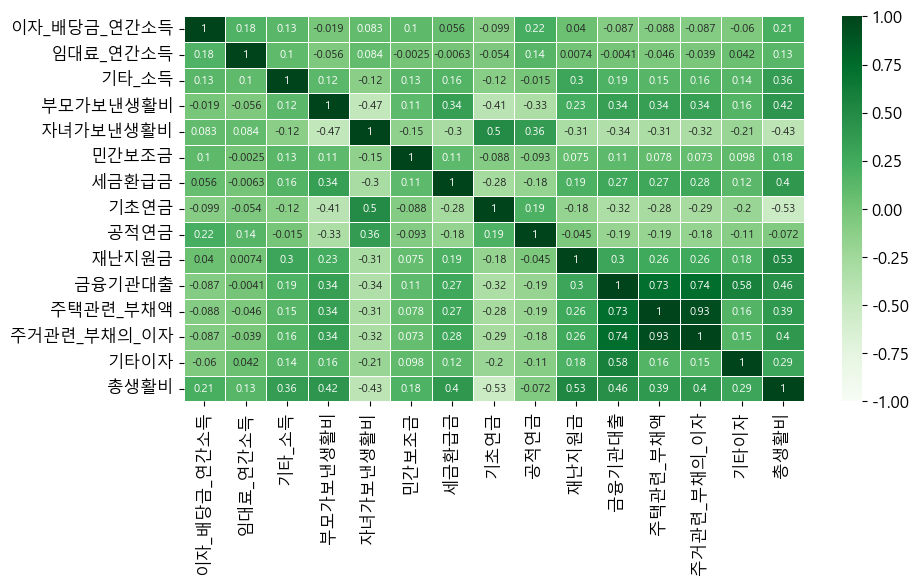

In [41]:
corr2 = merge_df.corr(method='spearman')
# corr.head()

plt.rcParams["figure.figsize"] = (10,5)

sb.heatmap(corr2,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상(Greys,Purples,Blues,Greens,Oranges,Reds,OrRd,PuRd,RdPu,BuPu,GnBu,PuBu,YlGnBu,PuBuGn,BuGn,YlGn)
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5, #구분선 굵기
           annot_kws={"size": 8}  # 글자 크기 조정
)

plt.show()
plt.close()

# #다중선형회귀분석(Multiple Linear Regression) 실행

- case1: pca분석에서 weak로 나온 3개의 독립변수를 제외하지 않고 모든 변수를 넣은채로 분석 시행

- case2: weak 중 하나인 임대료_연간소득만 제외하고 시행

- case3: weak 중 하나인 주택관련_부채액만 제외하고 시행

- case4: weak 중 하나인 주거관련_부채의_이자만 제외하고 시행

- case5: weak 중 임대료_연간소득 및 주택관련_부채액 2가지 weak변수 제외하고 시행

- case6: weak 중 임대료_연간소득 및 주거관련_부채의_이자 2가지 weak변수 제외하고 시행

- case7: weak 중 주택관련_부채액 및 주거관련_부채의_이자 2가지 weak변수 제외하고 시행

- case8: weak 변수 3가지 전부 제외하고 시행


"""
get_df함수를 응용하여 경우의 수를 전부 계산하여 비교,분석을 진행해본다.

(E. 확증적 데이터 분석(CDA)/04. 선형회귀분석/10-선형회귀_예시(2).ipynb 참고)
"""

In [42]:
# get_df함수를 응용하여 경우의 수를 전부 계산하여 비교,분석을 진행해본다.
# (E. 확증적 데이터 분석(CDA)/04. 선형회귀분석/10-선형회귀_예시(2).ipynb 참고)

def get_df(case_number, is_scale=False):
    # weak를 빼지 않고 사용하는 경우
    if case_number == 1:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주택관련_부채액','주거관련_부채의_이자']
    # 임대료_연간소득를 제거한 경우
    elif case_number == 2:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주택관련_부채액','주거관련_부채의_이자']
    # 주택관련_부채액을 제거한 경우
    elif case_number == 3:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주거관련_부채의_이자']
    # 주거관련_부채의_이자를 제거한 경우
    elif case_number == 4:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득','주택관련_부채액']
    
    # 임대료_연간소득 및 주택관련_부채액 2가지 weak변수 제거했을 경우
    if case_number == 5:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주거관련_부채의_이자']

    # 임대료_연간소득 및 주거관련_부채의_이자 2가지 weak변수 제거했을 경우
    if case_number == 6:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','주택관련_부채액']

    # 주택관련_부채액 및 주거관련_부채의_이자 2가지 weak변수 제거했을 경우
    if case_number == 7:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비','임대료_연간소득']
    
    # weak 3가지 전부 뺐을 경우
    if case_number == 8:
        # 사용할 변수 이름들
        fnames1 = ['총생활비','민간보조금', '이자_배당금_연간소득', '기초연금', '기타이자', '공적연금', '기타_소득','금융기관대출','부모가보낸생활비','재난지원금','세금환급금','자녀가보낸생활비']


    # 표준화를 적용하지 않은 경우
    if not is_scale:
        tmp = df2.filter(fnames1)
    # 표준화를 적용한 경우
    else:
        # 미리 적용해 둔 표준화 결과를 병합, 필터 함수 이용
        left = x_train_std_df.filter(fnames1)
        # 원본 데이터만 필요할 경우 
        right = y_train_std_df
        # 결합
        tmp = merge(left, right, left_index=True, right_index=True)
        None
        
    tmp2 = get_dummies(tmp, drop_first=True, dtype='int')
    return tmp2

In [43]:
# target_df = get_df(`확인할 case 번호`, True)

target_df = get_df(7, True)
helper.prettyPrint(target_df.head())

# 독립변수 이름만 추출
xnames = list(target_df.columns)
xnames.remove('총생활비')
xnames

ols_result = helper.myOls(target_df, y='총생활비', x=xnames)

helper.prettyPrint(ols_result.table)
    
print(ols_result.result, end="\n\n")

print(ols_result.goodness, end="\n\n")

for i in ols_result.varstr:
    print(i)

# 확인 결과 case_number == 1이 비교적 설명력이 좋은것으로 확인.

+----+--------------+------------------------+------------+------------+------------+-------------+----------------+--------------------+--------------+--------------+--------------------+-------------------+------------+
|    |   민간보조금 |   이자_배당금_연간소득 |   기초연금 |   기타이자 |   공적연금 |   기타_소득 |   금융기관대출 |   부모가보낸생활비 |   재난지원금 |   세금환급금 |   자녀가보낸생활비 |   임대료_연간소득 |   총생활비 |
|----+--------------+------------------------+------------+------------+------------+-------------+----------------+--------------------+--------------+--------------+--------------------+-------------------+------------|
|  0 |      1.48854 |              -0.215825 |  -0.880946 |   0.861872 |  -0.427626 |  -0.0045817 |       0.888392 |          -0.209725 |    -0.580214 |    -0.242354 |           0.653613 |         -0.200522 |  -0.148503 |
|  1 |    -0.237737 |              -0.215825 |   0.757655 |  -0.133894 |  -0.427626 |  -0.0045817 |      -0.367689 |          -0.209725 |    -0.622254 |    -0.242354 |           0.36232

## #MLR 결과

`case_number == 1`
- 𝑅(0.397), 𝑅^2(0.396), 𝐹(369.5), 유의확률(0.00), Durbin-Watson(1.880)

`case_number == 2`
- 𝑅(0.389), 𝑅^2(0.388), 𝐹(384.4), 유의확률(0.00), Durbin-Watson(1.872)

`case_number == 3`
- 𝑅(0.394), 𝑅^2(0.393), 𝐹(392.3), 유의확률(0.00), Durbin-Watson(1.876)

`case_number == 4`
- 𝑅(0.397), 𝑅^2(0.396), 𝐹(397.9), 유의확률(0.00), Durbin-Watson(1.880)

`case_number == 5`
- 𝑅(0.387), 𝑅^2(0.386), 𝐹(412.3), 유의확률(0.00), Durbin-Watson(1.869)

`case_number == 6`
- 𝑅(0.389), 𝑅^2(0.388), 𝐹(416.5), 유의확률(0.00), Durbin-Watson(1.872)

`case_number == 7`
- 𝑅(0.392), 𝑅^2(0.391), 𝐹(422.2), 유의확률(0.00), Durbin-Watson(1.876)

`case_number == 8`
- 𝑅(0.386), 𝑅^2(0.385), 𝐹(448.0), 유의확률(0.00), Durbin-Watson(1.869)

- 결론
> case_number == 1의 결과 값이 비교적 분석에 적합하다고 판단, case_number == 1을 분석에 사용하기로 결정.

## #MLR 결과 시각화

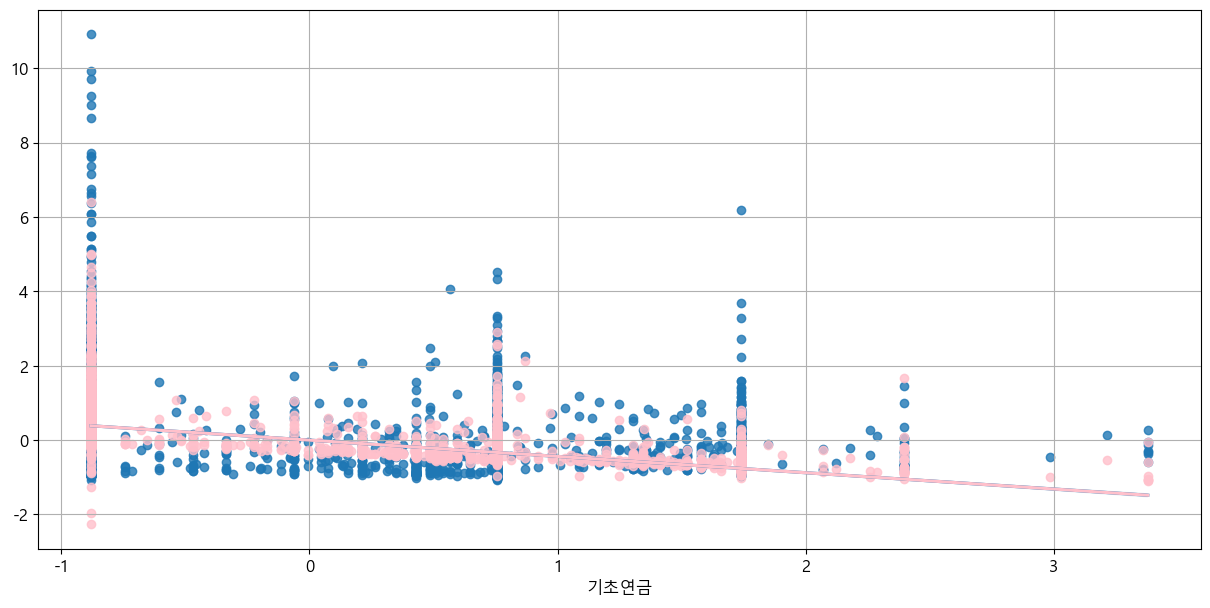

In [44]:
# # `기초연금`에 따른 `총생활비`출 비교

plt.figure(figsize=(15, 7))
sb.regplot(data=target_df, x='기초연금', y='총생활비')
sb.regplot(data=target_df, x='기초연금', y=ols_result.fit.fittedvalues, color='pink')
plt.grid()
plt.plot()
plt.show()

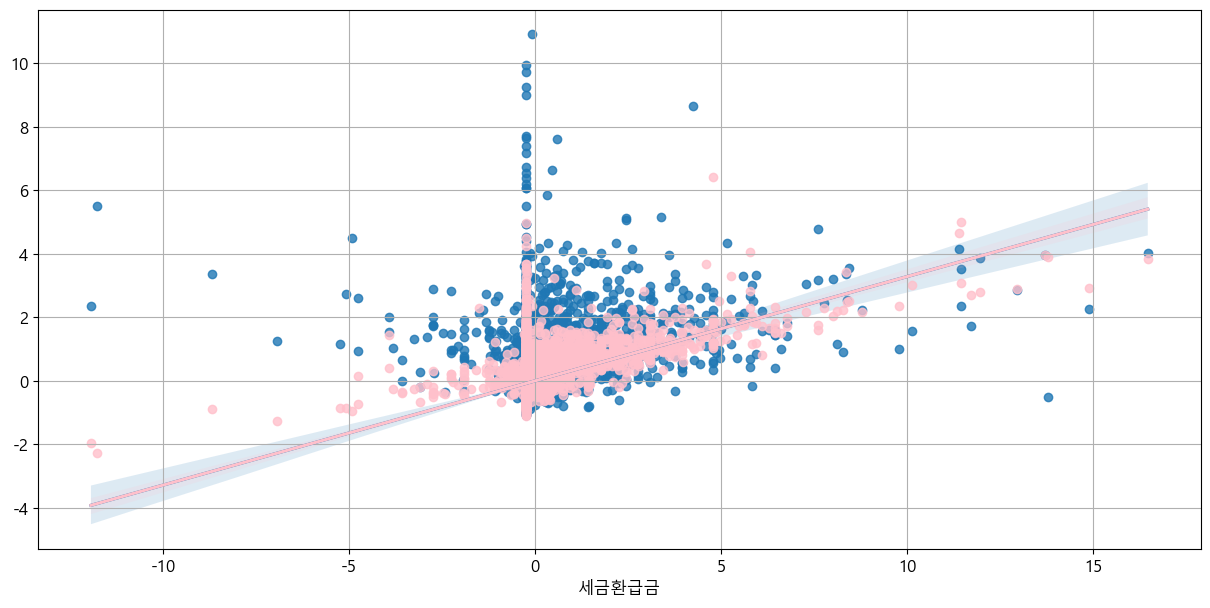

In [45]:
# # `세금환급금`에 따른 `총생활비` 비교

plt.figure(figsize=(15, 7))
sb.regplot(data=target_df, x='세금환급금', y='총생활비')
sb.regplot(data=target_df, x='세금환급금', y=ols_result.fit.fittedvalues, color='pink')
plt.grid()
plt.plot()
plt.show()

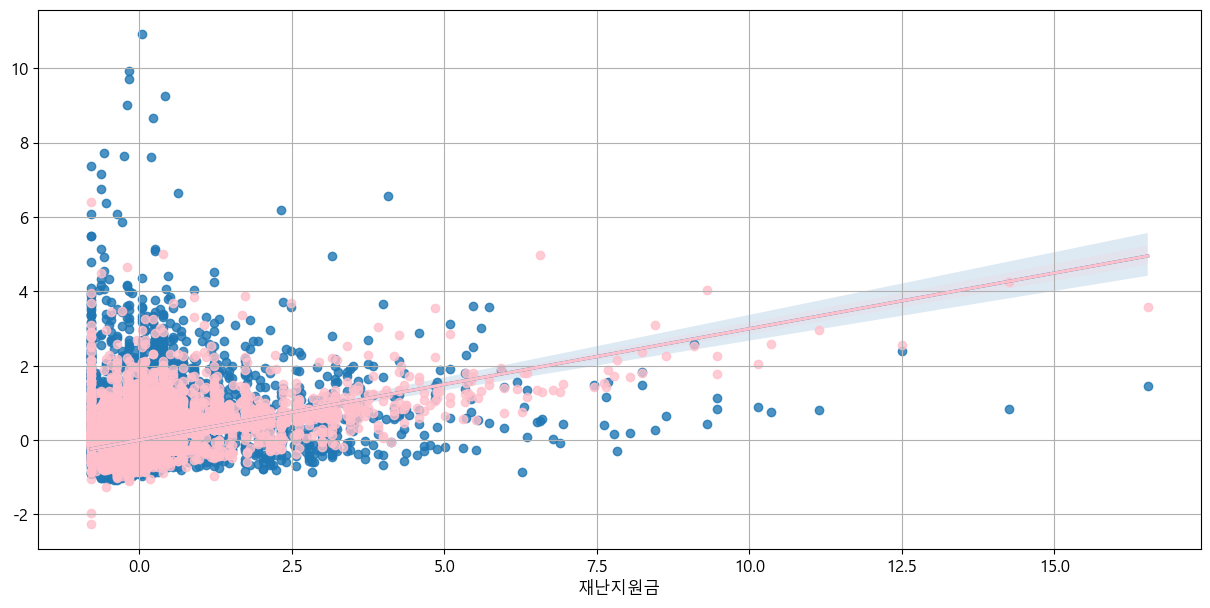

In [46]:
# # `재난지원금`에 따른 `총생활비`비교

plt.figure(figsize=(15, 7))
sb.regplot(data=target_df, x='재난지원금', y='총생활비')
sb.regplot(data=target_df, x='재난지원금', y=ols_result.fit.fittedvalues, color='pink')
plt.grid()
plt.plot()
plt.show()

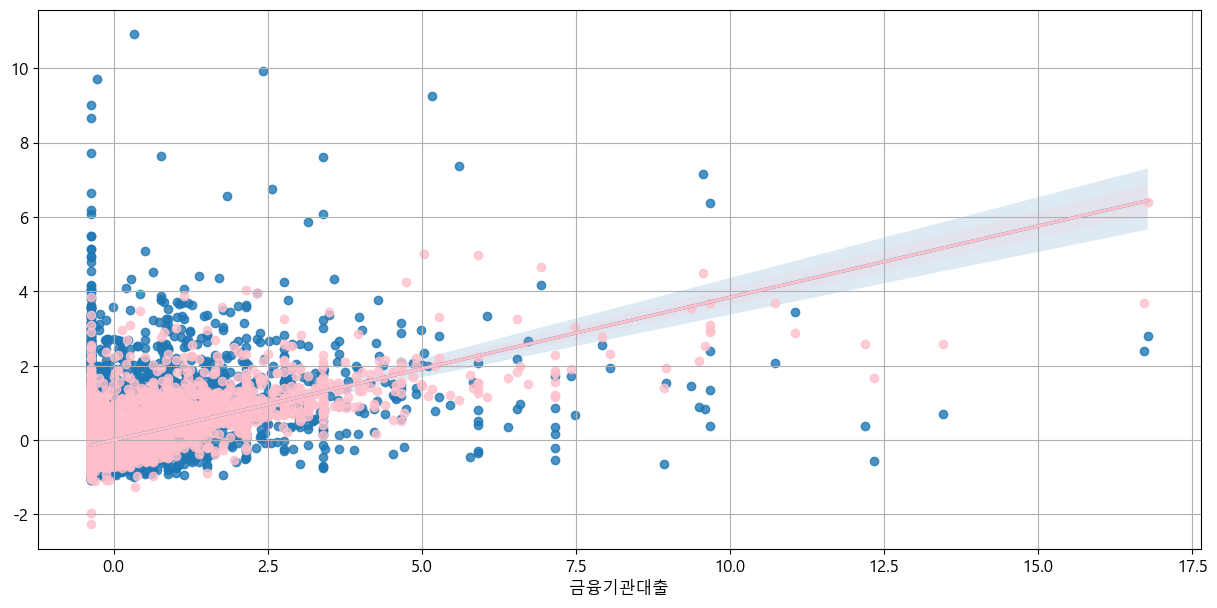

In [47]:
# # `금융기관대출`에 따른 `총생활비` 비교

plt.figure(figsize=(15, 7))
sb.regplot(data=target_df, x='금융기관대출', y='총생활비')
sb.regplot(data=target_df, x='금융기관대출', y=ols_result.fit.fittedvalues, color='pink')
plt.grid()
plt.plot()
plt.show()

### #MLR 시각화 결과

네 개의 그래프 모두 비교적 준수한 예측 성능을 나타낸다고 판단이됨.

## #MLR 결과 보고

다중선형회귀분석 확인 결과 Durbin-Watson의 경우 1.880로 2에 근접하여 다중회귀분석모형에 적합하다고 판단.

VIF값은 10미만으로 각 요인별 다중공선성은 없는것으로 확인되었다.

Adj. R-squared 값은 0.396로 약 40%의 설명력을 나타냈다.

𝐹(369.5), 유의확률(0.00)로 통계적으로 유의미하며 모집단에서도 의미있다고 볼 수 있다.

## #총생활비에 가장 큰 영향을 미치는 4가지 요소

1. 기초연금
- 회귀계수는 -0.2649(p<0.05)로 음수이다. 이는 곧 총생활비와 기초연금 간에는 음의 상관관계가 있고
- 기초연금 금액이 증가할 수록 총생활비가 감소한다는 것을 의미한다.
- 기초연금은 65세 이상 노인들이 받는 연금으로서 이 말을 데이터 수치만 보고 해석해보자면 노인일수록 생활하는데 지불하는 비용이 적어진다는 것을 추론 할 수 있다.(즉 돈을 많이 쓰지 않는다는 말과 같다.)

2. 세금환급금
- 회귀계수는 양수 0.2052(p<0.05)로 총생활비와 세금환급금 간에는 양의 상관관계가 존재해 환급액이 많을 수록 총생활비도 증가한다는 것을 의미한다. 
- 세금환급액이 많다는 건 일반적으로 소비가 많아 그만큼 세액공제 혜택을 많이 받는다는 것을 뜻하기 때문에 합리적인 결과라고 추측된다.

3. 재난지원금
- 회귀계수는 양수 0.1813(p<0.05)로 총생활비와 재난지원금 간에는 양의 상관관계가 존재해 `재난지원금액이 많을 수록 총생활비도 증가`한다는 것을 의미한다.
- 일반적으로 생각했을 때 재난지원금은 코로나19로 인해 정부에서 국민의 생계 안정과 소비촉진 등을 위하여 지원하는 금액(복지제도)이며 소득의 증가와 함께 부가적으로 발생한 혜택을 적극적으로 활용한 만큼 소비량의 상승을 예상할 수 있다.

4. 금융기관대출
- 회귀계수는 양수 0.1322(p<0.05)로 총생활비와 금융기관대출 간에는 양의 상관관계가 존재해 대출액이 많을 수록 총생활비도 증가한다는 것을 의미한다.
- 금융기관대출의 높은 액수는 일반적으로 자본력과 수입의 크기를 나타내며, 이를 토대로 이자와 원금을 상환할 능력이 충분하다고 추론할 수 있다. 
- 따라서 고액의 대출은 소비력이 높은 삶을 뒷받침하는 요인이 될 수 있다. 이는 풍요로운 생활을 누리며(총생활비↑) 큰 금액의 대출도 효율적으로 활용할 수 있는 경제적 안정성을 시사한다고 볼 수 있다.

## #잔차 검사

결과값을 토대로 종속/독립변수가 선형성을, 잔차가 정규성을 따르는지 확인해본다.

In [48]:
sdf = DataFrame({
    "관측값": df3['총생활비'],
    "예측값": ols_result.fit.fittedvalues,
    "잔차": ols_result.fit.resid,
    "zscore": stats.zscore(ols_result.fit.fittedvalues)
})

sdf

,관측값,예측값,잔차,zscore
0,-0.148503,0.322417,-0.470920,0.514704
1,-0.281743,-0.540016,0.258273,-0.862077
2,-0.588933,-0.021453,-0.567480,-0.034248
3,0.835987,-0.564343,1.400330,-0.900912
4,-0.851711,-0.503946,-0.347764,-0.804496
...,...,...,...,...
7854,0.254916,0.389493,-0.134578,0.621784
7855,1.479977,1.548282,-0.068305,2.471665
7856,1.035846,1.281421,-0.245575,2.045651
7857,0.913710,0.255649,0.658061,0.408116


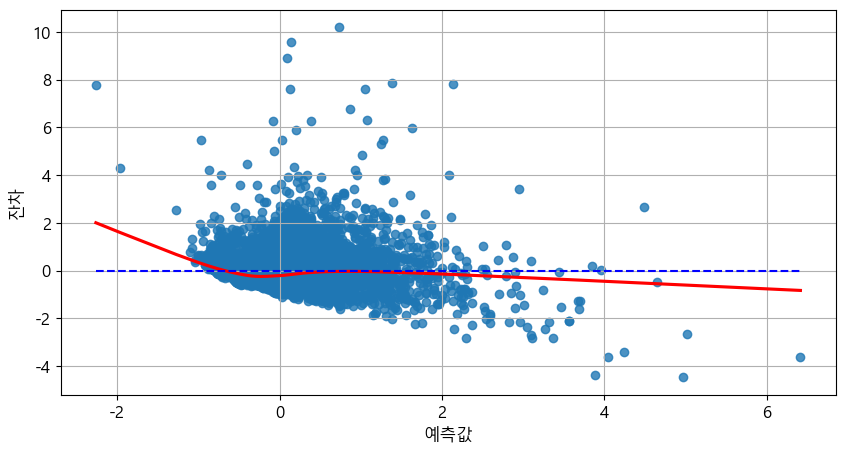

In [49]:
# 잔차의 선형성 시각화
xmin = sdf['예측값'].min()
xmax = sdf['예측값'].max()
xrange = [xmin, xmax]
yrange = [0,0]

plt.figure()
sb.regplot(data = sdf, x = '예측값', y = '잔차', lowess = True, line_kws={'color':'red'})
sb.lineplot(x = xrange, y = yrange, color = 'blue', linestyle = '--')
plt.grid()
plt.show()
plt.close()

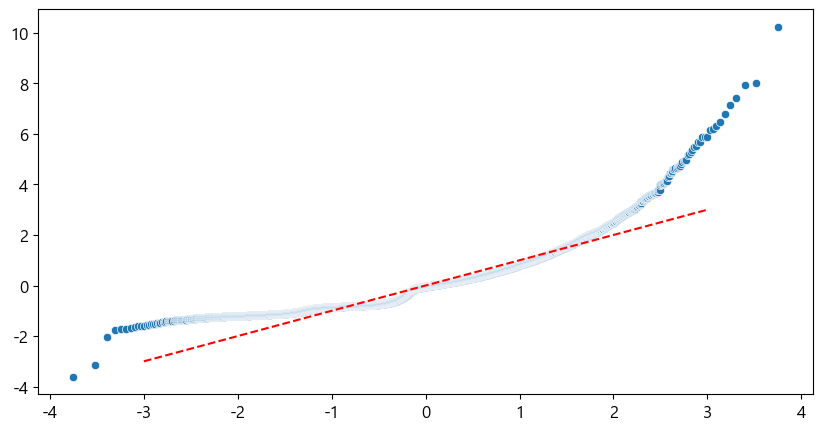

In [50]:
# q-q plot 그래프 시각화(잔차의 정규성 확인)
(x, y), _ = stats.probplot(sdf['zscore'])

plt.figure(figsize=(10, 5))
sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')
plt.show()
plt.close()

### #잔차분석 결과

- 처음 부분과 끝 부분이 정규분포를 따르지 않는것으로 확인.
- 데이터가 정규분포보다 위쪽에 위치해있기 때문에 오른쪽으로 치우져져 있음을 알 수 있다.
- 이는 변수들 중에서 평균보다 큰 값이 많아서(이상치가 많아서) 분포의 오른쪽 끝이 길게 뻩어져 있음을 알 수 있다.
- 상기 내용은 기초통계량에서 예측한 것과 같다.
- 또한 이상치가 분석 결과에 영향을 미칠 수 있음을 고려할 필요가 있다고 볼 수 있다.

In [93]:
ols = helper.myOls(sdf, x = '예측값', y = '잔차')
MSE_sq = np.sqrt(ols.fit.mse_resid)
r = ols.fit.resid

r1 = r[ (r > -MSE_sq) & (r < MSE_sq)].count() / r.count() * 100
r2 = r[ (r > -2*MSE_sq) & (r < 2*MSE_sq)].count() / r.count() * 100
r3 = r[ (r > -3*MSE_sq) & (r < 3*MSE_sq)].count() / r.count() * 100

mse_r = [r1, r2, r3]

print(f"루트 1MSE 구간에 포함된 잔차 비율 : {r1:1.2f}%")
print(f"루트 2MSE 구간에 포함된 잔차 비율 : {r2:1.2f}%")
print(f"루트 3MSE 구간에 포함된 잔차 비율 : {r3:1.2f}%")

루트 1MSE 구간에 포함된 잔차 비율 : 83.03%
루트 2MSE 구간에 포함된 잔차 비율 : 95.89%
루트 3MSE 구간에 포함된 잔차 비율 : 98.46%


c:\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


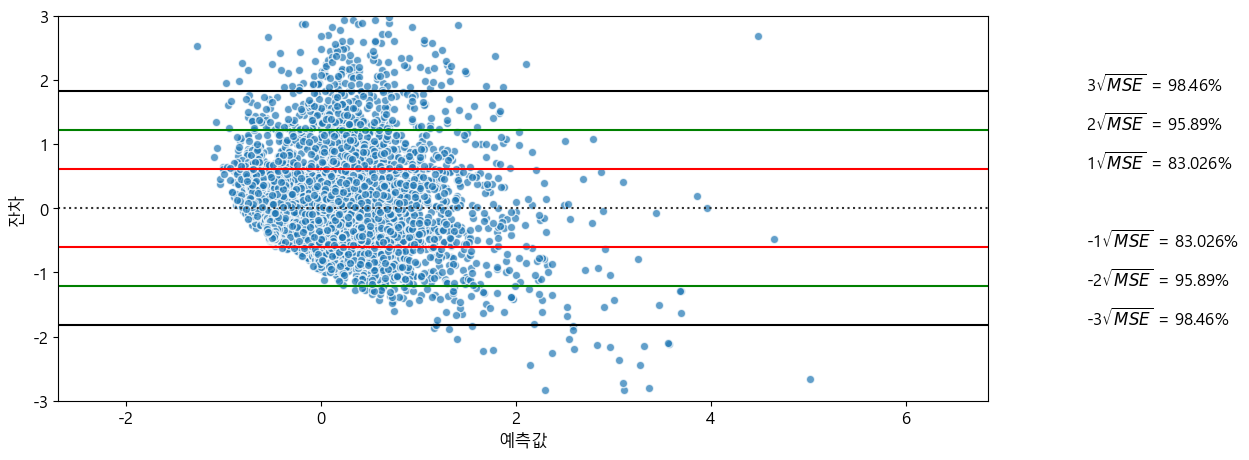

In [94]:
plt.rcParams["figure.figsize"] = (12, 5)

mse_sq = ols.fit.mse_resid

# 예측값과 실제값간의 잔차를 구해서 표시해주는 그래프
sb.residplot(data=sdf, x='예측값', y='잔차', scatter_kws = {'edgecolor':"white", "alpha":0.7})

# 반복문으로 잔차도 생성(MSE)
for i, c in enumerate(['red', 'green', 'black']):
    plt.axhline((i+1) * mse_sq, color=c)
    plt.axhline(-(i+1) * mse_sq, color=c)

# 현재 표시되는 그래프의 x축 범위를 가져온다.
xmin, xmax = plt.xlim()
plt.ylim(-3,3)

# MSE 값 그래프에 시각화(위치는 범례처럼 수동으로 설정)
for i, c in enumerate(['red', 'green', 'black']):
    plt.text(s=f"{i+1}"r'${}\sqrt{MSE}$ = %s%%' % mse_r[i].round(3), x=xmax+1, y=(i+1) * mse_sq)
    plt.text(s=f"-{i+1}"r'${}\sqrt{MSE}$ = %s%%' % mse_r[i].round(3), x=xmax+1, y=-(i+1) * mse_sq)

plt.show()
plt.close()